In [1]:
# 改良版 2020/6/10

In [2]:
# 学習部




# kerasのデータセットが必要なのでインポート
from keras.datasets import mnist
# numpyを使用するのでインポート
import numpy as np

import matplotlib.pyplot as plt

# kerasから文字データを取得
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# kerasから受け取ったデータをnumpy配列化
# images:縦28×横28ピクセルの大きさの1000個の文字データが入った28×28×1000の三次配列
images = np.array(x_train[0:1000])
# labels:imagesのインデックスと対応した実際に書かれた数字が入ったサイズが1000の一次配列
labels = np.array(y_train[0:1000])
# images配列の28×28の部分がそのままだと処理しにくいので784(784=28×28)×1000の二次配列に変更する
images=np.reshape(images,(-1,784))
# 入力値(images)の数とニューラルネットワークの大きさに対応する784*10のそれぞれ初期値の0.00001が入った重みの二次配列を作る
# ※二次元目が大きすぎるとones関数はエラーを吐くことがあるので一次元目と二次元目が逆の配列を作り転置する
wei=np.ones((10,784)).T*.00001
# 実際の数値を配列にしていくためのすべて０が入った10×1000の配列を作っておく
ans=np.zeros((1000,10))
# 学習速度の調整
alp=0.0000001
# 実際の数字のインデックスの部分だけが１で他が０になるような誤差を求めるための配列を作成
# ex)5なら[0,0,0,0,0,1,0,0,0,0]
for j in range(1000):
    ans[j][labels[j]]=1
# 学習した回数の累計と学習を繰り返す数の初期化と指定
ln=0
step=100
# 合計学習回数を格納
done=labels.size*step

# 正誤と誤りの大きさを入れるための配列
acu=np.zeros(done)
err_lis=np.empty(done)
# 誤った数字を入れるための配列
err_num=np.zeros((10,10))
for l in range(step):
    #今何文字目なのかの数を入れる数の指定     
    i=0
    for item in images:
#       予測値を導出
        pred=np.dot(item,wei)
#     　純誤差(偏差)の導出
        err=pred-ans[i]
#     　エラーと入力値による直積でデルタを導出
        DaM=np.outer(item,err)
#       一番大きい(1に近い)値をpredから取り出す
        nea=pred.argmax()
#     　実際の値に対しての誤差の大きさを出し、格納
        ers=round((1-pred[labels[i]])**2,7)
        err_lis[ln]=ers
#        正誤判定
        if labels[i]==nea:
            ok="〇"
            acu[ln]=1
        else:
            ok="×"
            err_num[labels[i]][nea]=err_num[labels[i]][nea]+1
#        出力
        print(ln+1,"回目　",ok,"実際の数字:",labels[i],"予測した数字",nea,"誤差指数",ers)
#       各回数をインクリメント
        i+=1
        ln+=1
#        学習結果の反映
        wei-=(DaM*alp)

1 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5252626
2 回目　 × 実際の数字: 0 予測した数字 5 誤差指数 0.6166615
3 回目　 × 実際の数字: 4 予測した数字 0 誤差指数 0.7364127
4 回目　 × 実際の数字: 1 予測した数字 0 誤差指数 0.8304281
5 回目　 × 実際の数字: 9 予測した数字 0 誤差指数 0.8136127
6 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.8313838
7 回目　 × 実際の数字: 1 予測した数字 2 誤差指数 0.8185164
8 回目　 × 実際の数字: 3 予測した数字 2 誤差指数 0.9695731
9 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.6027387
10 回目　 × 実際の数字: 4 予測した数字 3 誤差指数 0.7810758
11 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3419189
12 回目　 × 実際の数字: 5 予測した数字 1 誤差指数 1.0490547
13 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0824943
14 回目　 × 実際の数字: 6 予測した数字 3 誤差指数 0.9860054
15 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.576642
16 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 1.0109995
17 回目　 × 実際の数字: 2 予測した数字 3 誤差指数 0.8713361
18 回目　 × 実際の数字: 8 予測した数字 7 誤差指数 1.0918409
19 回目　 × 実際の数字: 6 予測した数字 8 誤差指数 0.767693
20 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.9721675
21 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4795188
22 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.4360801
23 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.6753079
24 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.5784781
25 

220 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.6406279
221 回目　 × 実際の数字: 2 予測した数字 5 誤差指数 0.6438585
222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0548593
223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0953867
224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1099585
225 回目　 × 実際の数字: 1 予測した数字 7 誤差指数 0.8518066
226 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.7288642
227 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.481175
228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3145699
229 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.7685897
230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002385
231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4265768
232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0789291
233 回目　 × 実際の数字: 0 予測した数字 6 誤差指数 0.9357656
234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2614873
235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0674665
236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1069552
237 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.3486719
238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1783637
239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1852481
240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0834951
241 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.6688835
242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2580928
243 回目　 〇 実際

442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1809432
443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2179757
444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2060516
445 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.7516962
446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0042194
447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2717582
448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1747946
449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3866012
450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0544105
451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229766
452 回目　 × 実際の数字: 0 予測した数字 7 誤差指数 0.4595282
453 回目　 × 実際の数字: 3 予測した数字 2 誤差指数 0.4325803
454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0346297
455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0782779
456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000206
457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1987974
458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1918884
459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0055595
460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.7125697
461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4156756
462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0829564
463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008432
464 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.6592104
465 回目　 〇 実際

664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0164349
665 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.3714597
666 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.7368093
667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.421032
668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1661711
669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0458883
670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1466574
671 回目　 × 実際の数字: 3 予測した数字 0 誤差指数 1.4103889
672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0609728
673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0350875
674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1187017
675 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.3551284
676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0289369
677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0970643
678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2849972
679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0825039
680 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.7390051
681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1428288
682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.093622
683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.5574955
684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063936
685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0245076
686 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3218552
687 回目　 〇 実際の

886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1259128
887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0788288
888 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.355679
889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2539125
890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3973548
891 回目　 × 実際の数字: 3 予測した数字 7 誤差指数 0.4038119
892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0933704
893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.5693083
894 回目　 × 実際の数字: 2 予測した数字 3 誤差指数 0.3865666
895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3243166
896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0017734
897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1874098
898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0053978
899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0317862
900 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 1.2038489
901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4787037
902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0503267
903 回目　 × 実際の数字: 9 予測した数字 0 誤差指数 1.0939562
904 回目　 × 実際の数字: 0 予測した数字 9 誤差指数 0.5152967
905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0028371
906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.130968
907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2018831
908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1661613
909 回目　 〇 実際の

1089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0467212
1090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0198678
1091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0224013
1092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0707161
1093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3030661
1094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0468586
1095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0982158
1096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002375
1097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1424192
1098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.003811
1099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0250452
1100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2470159
1101 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.9114853
1102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0849114
1103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0159041
1104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0232678
1105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1057624
1106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.4e-06
1107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1184599
1108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1504716
1109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0458396
1110 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 1.4268027
1111 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0

1368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0096007
1369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1820185
1370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0268881
1371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.7136605
1372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0098565
1373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1615418
1374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0066164
1375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1199897
1376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018895
1377 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.6527864
1378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0177354
1379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0160209
1380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1096678
1381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.125161
1382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0619891
1383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2373999
1384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.013657
1385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.3987461
1386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0276492
1387 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.4675588
1388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007018
1389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3806527
1390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 

1583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2394174
1584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.368529
1585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4660615
1586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2500101
1587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4535464
1588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1565348
1589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.5962042
1590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.6626787
1591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1745549
1592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0014264
1593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2354166
1594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0165117
1595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 1.1566938
1596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0584181
1597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1895361
1598 回目　 × 実際の数字: 6 予測した数字 9 誤差指数 0.3458054
1599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0208186
1600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1613612
1601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.338599
1602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.269512
1603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3892959
1604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2272375
1605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0

1792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0057756
1793 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.4840855
1794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0102031
1795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0332574
1796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0671334
1797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2222858
1798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0279771
1799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0422368
1800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1438951
1801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0655993
1802 回目　 × 実際の数字: 2 予測した数字 4 誤差指数 0.8055576
1803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1134539
1804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0342108
1805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1404969
1806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1624441
1807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0945416
1808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.078041
1809 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.5310731
1810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0525074
1811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0625191
1812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1616738
1813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0082601
1814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数

2021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0654678
2022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.8e-06
2023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4064116
2024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0640133
2025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 1.3407208
2026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1953304
2027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4592642
2028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0198843
2029 回目　 × 実際の数字: 2 予測した数字 0 誤差指数 0.2811559
2030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6996401
2031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.27437
2032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1765487
2033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0600695
2034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8047199
2035 回目　 × 実際の数字: 0 予測した数字 6 誤差指数 0.273641
2036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3383928
2037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1165559
2038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0361126
2039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1289551
2040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1478411
2041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0375043
2042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1878034
2043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2

2258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.017655
2259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4549022
2260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1982243
2261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1593387
2262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0725009
2263 回目　 × 実際の数字: 2 予測した数字 0 誤差指数 0.5362842
2264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0262985
2265 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6563111
2266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0710633
2267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1117747
2268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0930916
2269 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.5448915
2270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0599864
2271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1665235
2272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1195046
2273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1044176
2274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.078949
2275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3860654
2276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.007706
2277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0492846
2278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0372548
2279 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.5251939
2280 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0

2662 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.4823853
2663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.029692
2664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0047959
2665 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.1830551
2666 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.5593611
2667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3806204
2668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1752072
2669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0352084
2670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1366319
2671 回目　 × 実際の数字: 3 予測した数字 2 誤差指数 0.6436946
2672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0350757
2673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0255724
2674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0260932
2675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2598534
2676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0140663
2677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0520116
2678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.157242
2679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0654919
2680 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.6158345
2681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1572642
2682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0077969
2683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4132523
2684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 

2859 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.9013915
2860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0626007
2861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0029387
2862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0205274
2863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.112997
2864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2285304
2865 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6255596
2866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0594157
2867 回目　 × 実際の数字: 2 予測した数字 3 誤差指数 0.4423282
2868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.074976
2869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5071278
2870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2189977
2871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4426711
2872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005932
2873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0116974
2874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0070063
2875 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.2440234
2876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0048155
2877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1284277
2878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1861844
2879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0945047
2880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.6850377
2881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 

3121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0023532
3122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0130363
3123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1999335
3124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0028412
3125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0762497
3126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1378417
3127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0020719
3128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.047912
3129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.040381
3130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0150975
3131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.127399
3132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0657452
3133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 1.1768492
3134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4500743
3135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 1.0861893
3136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1248164
3137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1968417
3138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5955203
3139 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.4385622
3140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0472703
3141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4437344
3142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1176255
3143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0

3346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0535907
3347 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5427454
3348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0211408
3349 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.3096735
3350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0022374
3351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.05082
3352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1200139
3353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.6656769
3354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1074952
3355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3529123
3356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0643639
3357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.269205
3358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.56e-05
3359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0574056
3360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0207866
3361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1392184
3362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0546505
3363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2222868
3364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0705498
3365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3634206
3366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0909386
3367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0857709
3368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.

3563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0026891
3564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0537142
3565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1496932
3566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.036966
3567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0590284
3568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.068517
3569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2760863
3570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1265766
3571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0113108
3572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0010392
3573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0056082
3574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0008502
3575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.5123577
3576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0813004
3577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3175677
3578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0120066
3579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2613914
3580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2594538
3581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0076282
3582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0404814
3583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1678109
3584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3386527
3585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 

3776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1915302
3777 回目　 × 実際の数字: 0 予測した数字 5 誤差指数 0.4368841
3778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0202907
3779 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.720083
3780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0581528
3781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0305378
3782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0082596
3783 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5651483
3784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0366044
3785 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.8325101
3786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.009324
3787 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3235222
3788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0034729
3789 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.7039645
3790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2092037
3791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1989311
3792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0019326
3793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4225898
3794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0123934
3795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0174921
3796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0520016
3797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1798424
3798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 

4003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0461352
4004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0596201
4005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0824404
4006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1049264
4007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0026689
4008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0607295
4009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0371804
4010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0157138
4011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0436445
4012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.172384
4013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0560428
4014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0033731
4015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0043603
4016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0362846
4017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4309354
4018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0745196
4019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1230483
4020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8568212
4021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0666349
4022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000485
4023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3855697
4024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0575011
4025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 

4198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1014345
4199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.316823
4200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0039911
4201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0776996
4202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2145963
4203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.308645
4204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0066031
4205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.183816
4206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.075702
4207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0397298
4208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3123752
4209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0266459
4210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067038
4211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.131885
4212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018993
4213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6361487
4214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.044028
4215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000397
4216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.00418
4217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.05268
4218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0490522
4219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0537599
4220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0158117

4441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0125929
4442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1350543
4443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1543122
4444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0844509
4445 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.5694839
4446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003929
4447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1318872
4448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1021028
4449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1717366
4450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0332085
4451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0071598
4452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2336545
4453 回目　 × 実際の数字: 3 予測した数字 2 誤差指数 0.2340151
4454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0296402
4455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0586844
4456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000179
4457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0939703
4458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.258358
4459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0073847
4460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.5260833
4461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2156622
4462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0011592
4463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 

4646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1497916
4647 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.2637406
4648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1794492
4649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2093825
4650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0335878
4651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4667397
4652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0031741
4653 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.3942585
4654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0467488
4655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0143334
4656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0224831
4657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0760751
4658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1371227
4659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0707894
4660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2633668
4661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2982246
4662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4384134
4663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0191299
4664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0034425
4665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1488845
4666 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.4945697
4667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3216661
4668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指

5010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0138017
5011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0405545
5012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1418199
5013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0605942
5014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0019989
5015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0036749
5016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0378358
5017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4145011
5018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0746259
5019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1104877
5020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8398188
5021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0646252
5022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007881
5023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3793907
5024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0558553
5025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 1.1210055
5026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1945275
5027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3768927
5028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0095295
5029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2417729
5030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.614399
5031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2775151
5032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数

5378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0145919
5379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0150995
5380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0897671
5381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0551454
5382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0326885
5383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2939969
5384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001136
5385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.294773
5386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0168219
5387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2876899
5388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4.06e-05
5389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2479885
5390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1384245
5391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6628418
5392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1010819
5393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0992553
5394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0146481
5395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1862926
5396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0130127
5397 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4893462
5398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0320274
5399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0322471
5400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 

5575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.4994985
5576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0749501
5577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2764236
5578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0078951
5579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2309617
5580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2306605
5581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0049684
5582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0265812
5583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1395409
5584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3113069
5585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.293244
5586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1773406
5587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2978326
5588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1630249
5589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.5190887
5590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.6472426
5591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.067781
5592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001072
5593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1902159
5594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007513
5595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.9675386
5596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.075543
5597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.

5830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0242368
5831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1676177
5832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0766402
5833 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4945192
5834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001988
5835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0831379
5836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229997
5837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3949703
5838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0195208
5839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0354859
5840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0142034
5841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2663684
5842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0041211
5843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1395548
5844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3047492
5845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3253998
5846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0875632
5847 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.7845545
5848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004775
5849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1203552
5850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.021455
5851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.656115
5852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 

6068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.07273
6069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.057711
6070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.045802
6071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0042729
6072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1623003
6073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0257926
6074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0053028
6075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0967996
6076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.023951
6077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4559729
6078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0203558
6079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0739756
6080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0607989
6081 回目　 × 実際の数字: 9 予測した数字 0 誤差指数 0.9777294
6082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.03764
6083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0007125
6084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0434788
6085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2788399
6086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0035316
6087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1623167
6088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1739734
6089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0695621
6090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.003

6294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.54e-05
6295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0460573
6296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0339731
6297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0682287
6298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0265691
6299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0566975
6300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0731958
6301 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.4484381
6302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068926
6303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001125
6304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0172889
6305 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4503578
6306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0329873
6307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0084663
6308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0448045
6309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0068294
6310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0370955
6311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0101746
6312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1579676
6313 回目　 × 実際の数字: 8 予測した数字 6 誤差指数 0.1278072
6314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0395912
6315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3817293
6316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数

6507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1259333
6508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0743587
6509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0167683
6510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1941509
6511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0131256
6512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1964374
6513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0709027
6514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0003188
6515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2043966
6516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0268351
6517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0238915
6518 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3587521
6519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4086901
6520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.047304
6521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.008239
6522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.007804
6523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0545228
6524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2612108
6525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3268733
6526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1976607
6527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0339396
6528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3198394
6529 回目　 × 実際の数字: 8 予測した数字 2 誤差指数 0

6726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0562051
6727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2275705
6728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0482729
6729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2801913
6730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1368342
6731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0617483
6732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2144994
6733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005194
6734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0109776
6735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.00074
6736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0065523
6737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0541573
6738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0266801
6739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1593132
6740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0294268
6741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0793248
6742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3168249
6743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0566317
6744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0128678
6745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6261265
6746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00424
6747 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.3207837
6748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.

6996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2150546
6997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0335487
6998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0089768
6999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3530649
7000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0567207
7001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3320296
7002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0545002
7003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0346299
7004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0484821
7005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0638658
7006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0780528
7007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002352
7008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0896502
7009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0353343
7010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0110565
7011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0369205
7012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1055866
7013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0645238
7014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006399
7015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030308
7016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0408355
7017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3885888
7018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指

7240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0055717
7241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.5329779
7242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.072312
7243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0276136
7244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0137537
7245 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.3617119
7246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0008831
7247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1738764
7248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1323779
7249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1184423
7250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.3e-05
7251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.394428
7252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0370944
7253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0836802
7254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0769794
7255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.405728
7256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0259705
7257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.4267249
7258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0093856
7259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.410088
7260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1329129
7261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0631
7262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.04513

7466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.000697
7467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.156236
7468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0024809
7469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1043994
7470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1667874
7471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4901784
7472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2038545
7473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4147742
7474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.053074
7475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0304337
7476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1221989
7477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0340884
7478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0873695
7479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0148344
7480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0242052
7481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2475096
7482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0281927
7483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3559115
7484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0008023
7485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0628339
7486 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.5202598
7487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1366431
7488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0

7659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0630803
7660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2064767
7661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2788135
7662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3890029
7663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0101849
7664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0022389
7665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1285245
7666 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.4570504
7667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2668715
7668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1675348
7669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0409668
7670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1184506
7671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3180967
7672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229193
7673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258579
7674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0144654
7675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1546919
7676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040894
7677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0282045
7678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0971153
7679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0626596
7680 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4677552
7681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指

7940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2547018
7941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1727427
7942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1411959
7943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004108
7944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3948359
7945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0636842
7946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4251346
7947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5130557
7948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2212293
7949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1387953
7950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1300701
7951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.005037
7952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1140928
7953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0753653
7954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0083756
7955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.047234
7956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0634359
7957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1781948
7958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0528829
7959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1214148
7960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0242832
7961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.03307
7962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0

8196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2929944
8197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.133098
8198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1001312
8199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3057746
8200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005848
8201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0752634
8202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1683715
8203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3183339
8204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0066029
8205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1812466
8206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0739536
8207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0299037
8208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2485229
8209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109657
8210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0039546
8211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0984998
8212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015809
8213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5728984
8214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0400174
8215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055676
8216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059778
8217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0507786
8218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数

8422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0213626
8423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0351133
8424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0846932
8425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1116858
8426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1767429
8427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0118008
8428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0087028
8429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0473157
8430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0023914
8431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0527345
8432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0078759
8433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1341626
8434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0067046
8435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2367507
8436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.21e-05
8437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2699393
8438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2116647
8439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0437847
8440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1073281
8441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0077682
8442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1319681
8443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1212961
8444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数

8829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2005005
8830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254506
8831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1369487
8832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1072248
8833 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4377785
8834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002904
8835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0758396
8836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0242697
8837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3500831
8838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.019291
8839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0217078
8840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0152536
8841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2379376
8842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0045536
8843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1137918
8844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2781791
8845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2908193
8846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0804895
8847 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.6431707
8848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016781
8849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0895944
8850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0229028
8851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数

9051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.182672
9052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0291354
9053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007778
9054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3136315
9055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2189855
9056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3313916
9057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0265743
9058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1341242
9059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0175365
9060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0348391
9061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.005435
9062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4486053
9063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1488265
9064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0079438
9065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2161901
9066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0743777
9067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0226903
9068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0766108
9069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0447828
9070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0367185
9071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038842
9072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1676044
9073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 

9281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0810687
9282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 3.16e-05
9283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4132117
9284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.025839
9285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1637676
9286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0796603
9287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0576058
9288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0127448
9289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0930434
9290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0624781
9291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0236783
9292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1114341
9293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.181883
9294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.39e-05
9295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0426065
9296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0388598
9297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0652655
9298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0311631
9299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0592516
9300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0534115
9301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4134759
9302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0047304
9303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.

9496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0058574
9497 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.4842568
9498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4375619
9499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0369679
9500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0142465
9501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.437371
9502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2135449
9503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4926553
9504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.197011
9505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0215905
9506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0410721
9507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1056997
9508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0716366
9509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0124592
9510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1461349
9511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109074
9512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1722584
9513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.089427
9514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 8.71e-05
9515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1786856
9516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0295077
9517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0214368
9518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.

9702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0022183
9703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0753365
9704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0320752
9705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2869931
9706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0028992
9707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2983511
9708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0314726
9709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3706045
9710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0839288
9711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0486706
9712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1722875
9713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1047342
9714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.015571
9715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1829275
9716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0393717
9717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2345463
9718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012885
9719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2284978
9720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0231435
9721 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5501452
9722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.033091
9723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2298013
9724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 

9976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0056406
9977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0172717
9978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0968292
9979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1774292
9980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1573221
9981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.171076
9982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.011869
9983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030532
9984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3749623
9985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0299275
9986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.017974
9987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0587663
9988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0492537
9989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.17749
9990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0652313
9991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1339473
9992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3394767
9993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3085313
9994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.137984
9995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0544427
9996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.1683177
9997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0212181
9998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00

10217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0511778
10218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.048397
10219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0373372
10220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.006439
10221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005618
10222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0301415
10223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0026711
10224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000105
10225 回目　 × 実際の数字: 1 予測した数字 7 誤差指数 0.6354015
10226 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.2987739
10227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1120708
10228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1073305
10229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3949854
10230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00643
10231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3493417
10232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.06981
10233 回目　 × 実際の数字: 0 予測した数字 6 誤差指数 0.443049
10234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1526395
10235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1631598
10236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.042888
10237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1630743
10238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0074671
10239 回目　 〇 実際の数字: 

10446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0049036
10447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0967804
10448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0723341
10449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1231943
10450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0271221
10451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007311
10452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1757554
10453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1902321
10454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0407295
10455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0709494
10456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 8.5e-06
10457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0656962
10458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1948386
10459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0138678
10460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.4321062
10461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.141419
10462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 4.74e-05
10463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016764
10464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4241917
10465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0049223
10466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001149
10467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1656807
10468 回目　 〇 実際

10668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.159996
10669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0405772
10670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.108178
10671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2381049
10672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.020333
10673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258059
10674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0165632
10675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1208415
10676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015322
10677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0209195
10678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0855713
10679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0606347
10680 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.421048
10681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1865714
10682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0020563
10683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2547206
10684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068517
10685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0333543
10686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1486548
10687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0944808
10688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1709726
10689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1836783
10690 回目　 〇 実際

10858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1350137
10859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.766901
10860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0548122
10861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011824
10862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053287
10863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0328157
10864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1755632
10865 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.434569
10866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0177004
10867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2367282
10868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0415692
10869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4118336
10870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1722342
10871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2964163
10872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0092253
10873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0112531
10874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.011255
10875 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.1975377
10876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0051623
10877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.120615
10878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1315697
10879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0791454
10880 回目　 × 実際

11154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1276586
11155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1737575
11156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0256423
11157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0273789
11158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0703859
11159 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.4547029
11160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.023527
11161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.7746964
11162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1725645
11163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1362958
11164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0042247
11165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.005888
11166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0163671
11167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0384386
11168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.312999
11169 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.3857419
11170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0053217
11171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0201851
11172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0308814
11173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1386871
11174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3235362
11175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1562542
11176 回目　 〇 実

11384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000404
11385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2713025
11386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0036493
11387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2568671
11388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002087
11389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2017556
11390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.125917
11391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6390487
11392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0757358
11393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0495739
11394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0059523
11395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1419038
11396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0158065
11397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4150824
11398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0160034
11399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0357326
11400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1045819
11401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0157635
11402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1050364
11403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0069557
11404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1368413
11405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3728055
11406 回目　 〇 

11617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0380795
11618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011847
11619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0278568
11620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1851117
11621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0774128
11622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0141709
11623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.013386
11624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1381956
11625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2041231
11626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1693413
11627 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6180548
11628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1183124
11629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2807421
11630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020808
11631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.170932
11632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2591304
11633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0253322
11634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0913257
11635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2164151
11636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.4289811
11637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1108215
11638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0991869
11639 回目　 〇 

11845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.26807
11846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0762666
11847 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.5478022
11848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0032215
11849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0701439
11850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0248589
11851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.6153812
11852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.010743
11853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2684317
11854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0162066
11855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.7644155
11856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021016
11857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0966376
11858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1336505
11859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7606788
11860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0542397
11861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010105
11862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0047779
11863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.027828
11864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1715525
11865 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4233498
11866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0159276
11867 回目　 〇 実際

12048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0595751
12049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4919315
12050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0283055
12051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1897789
12052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0204887
12053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0013953
12054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2967585
12055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.17943
12056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2976633
12057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0195069
12058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1399805
12059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.010452
12060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0318443
12061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0041148
12062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4460365
12063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1644645
12064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0056136
12065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2142099
12066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0722391
12067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0268979
12068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0791639
12069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0390563
12070 回目　 〇 実

12328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0142299
12329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.4385061
12330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0287827
12331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0481604
12332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0556034
12333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1365868
12334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0055543
12335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0603356
12336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0758914
12337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2619862
12338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0100544
12339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.106104
12340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0035646
12341 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.5495561
12342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.00883
12343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1662899
12344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3184183
12345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0317303
12346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0220084
12347 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.6372986
12348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0075729
12349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2223255
12350 回目　 〇 実

12577 回目　 × 実際の数字: 4 予測した数字 3 誤差指数 0.2432112
12578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0028494
12579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1563733
12580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.185677
12581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0026546
12582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0075051
12583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0870907
12584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2381741
12585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1659209
12586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1402933
12587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2136538
12588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1752955
12589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4830936
12590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.5498584
12591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0433432
12592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.009638
12593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1328582
12594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0064719
12595 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7609864
12596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0658852
12597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1777318
12598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1881661
12599 回目　 〇 

12810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0371527
12811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0216905
12812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1190741
12813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0061517
12814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0472528
12815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.008491
12816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0286883
12817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0023541
12818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1292494
12819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0404785
12820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.048647
12821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.149051
12822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1642051
12823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3021273
12824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1007387
12825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0801403
12826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0386782
12827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3053614
12828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0339874
12829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1524643
12830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.025805
12831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1109698
12832 回目　 〇 実際

13039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0828408
13040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1558563
13041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0130164
13042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.185553
13043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1115604
13044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1516543
13045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.269028
13046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0755388
13047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3965906
13048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0549321
13049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4847403
13050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0277744
13051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1917483
13052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0183434
13053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0015556
13054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2921588
13055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1692456
13056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2880889
13057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0177844
13058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1409795
13059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0087936
13060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.031114
13061 回目　 〇 実

13244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0105577
13245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3123432
13246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001427
13247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1522044
13248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0863439
13249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.122899
13250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5e-07
13251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3044148
13252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0333594
13253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.068923
13254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0720373
13255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3482434
13256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0144785
13257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.339615
13258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0043314
13259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4001925
13260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0892504
13261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.029472
13262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0332523
13263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3403495
13264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0347154
13265 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5182088
13266 回目　 〇 実際の数字:

13495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2224917
13496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0086586
13497 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.4639615
13498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.396572
13499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0281735
13500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0179005
13501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3876201
13502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1777852
13503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4767066
13504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1887746
13505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0217757
13506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0462103
13507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.087646
13508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0686537
13509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0087908
13510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1116219
13511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009052
13512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1480768
13513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1112467
13514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 1.81e-05
13515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.155532
13516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0298739
13517 回目　 〇 実際の

13748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0596
13749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1018695
13750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4322827
13751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3003921
13752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0164025
13753 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.3088442
13754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0183652
13755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3123309
13756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1948609
13757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0222828
13758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0036638
13759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011126
13760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0581384
13761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2059265
13762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0767332
13763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0697167
13764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2557545
13765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3117945
13766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0540188
13767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0032543
13768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1387552
13769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3063682
13770 回目　 〇 実

13980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.141382
13981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.156194
13982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0135588
13983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023821
13984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3519869
13985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0179407
13986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0111459
13987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0527248
13988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0452188
13989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1597523
13990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0444674
13991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1484079
13992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3096846
13993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2652488
13994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.139333
13995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0585312
13996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.1287869
13997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0125481
13998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0087314
13999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3455153
14000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0393136
14001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.277471
14002 回目　 〇 実際

14209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014697
14210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017536
14211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0811468
14212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012933
14213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5023433
14214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.039689
14215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0088609
14216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0037273
14217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0517791
14218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0503887
14219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.034001
14220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0062573
14221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0062902
14222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0382463
14223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0037336
14224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0013379
14225 回目　 × 実際の数字: 1 予測した数字 7 誤差指数 0.5791701
14226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2566376
14227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0890548
14228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0825638
14229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3357898
14230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0081318
14231 回目　 〇 

14475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0236839
14476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1151793
14477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0057666
14478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0985547
14479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0082568
14480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0294551
14481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1900079
14482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0209032
14483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3427037
14484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0019368
14485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.066488
14486 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.5694159
14487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1237
14488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0549017
14489 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.4173577
14490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0768507
14491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0046595
14492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4641187
14493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0683826
14494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0033643
14495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.216261
14496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0091459
14497 回目　 × 実際の

14696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0718295
14697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2738349
14698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2761063
14699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0541809
14700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3182206
14701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2183739
14702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0072538
14703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0577692
14704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0289869
14705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2450573
14706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001301
14707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2881232
14708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0327224
14709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3584541
14710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0830026
14711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0457652
14712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1732771
14713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0889135
14714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0059556
14715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1667716
14716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.023481
14717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1902328
14718 回目　 〇

14936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1456407
14937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3208772
14938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001997
14939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2354864
14940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2301011
14941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1701575
14942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1444156
14943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0016471
14944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2854091
14945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0867591
14946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3853148
14947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.4720917
14948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1462688
14949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1289346
14950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1031404
14951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0019667
14952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1187597
14953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0547919
14954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 5.83e-05
14955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0258911
14956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0538494
14957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1455197
14958 回目　 〇

15168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3414308
15169 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.379108
15170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0045134
15171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0199317
15172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.035655
15173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1275895
15174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3231848
15175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1630994
15176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 3.55e-05
15177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0068327
15178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0516015
15179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.117061
15180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0648458
15181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.8567115
15182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1080101
15183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2504767
15184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0101764
15185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024411
15186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0141352
15187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3860133
15188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0369783
15189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1881386
15190 回目　 〇 実際

15397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3992224
15398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0115882
15399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.037552
15400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1017222
15401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.021618
15402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1001458
15403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061592
15404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1583577
15405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3606782
15406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0144671
15407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018998
15408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0139616
15409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065409
15410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1386586
15411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0096007
15412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063849
15413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3735953
15414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0028982
15415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2975441
15416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1560955
15417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.119636
15418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0831572
15419 回目　 × 実

15656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0147411
15657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0515295
15658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1138506
15659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0488989
15660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1365566
15661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2562845
15662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.310908
15663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022086
15664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009836
15665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1061994
15666 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.4161928
15667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2053319
15668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1440569
15669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0396878
15670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0936071
15671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1585813
15672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0176586
15673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0255879
15674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0201266
15675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0881761
15676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 1.24e-05
15677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0130115
15678 回目　 〇 

15855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.7136787
15856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0030107
15857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0963715
15858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.129247
15859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7419151
15860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0523666
15861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005252
15862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0033468
15863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0140787
15864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1583462
15865 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.3876569
15866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0110357
15867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1885991
15868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0341559
15869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3821369
15870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1623869
15871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2547056
15872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0123427
15873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0086492
15874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0126261
15875 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.1751092
15876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.010181
15877 回目　 〇 

16084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0211045
16085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1705969
16086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 3.98e-05
16087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0555726
16088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1299945
16089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.049132
16090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012702
16091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0077183
16092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0533994
16093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2301152
16094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1976911
16095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0137794
16096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1e-07
16097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0338751
16098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0013864
16099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0277692
16100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1712994
16101 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.7085014
16102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0722525
16103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0083449
16104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0272063
16105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.010048
16106 回目　 〇 実際の数字

16280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.211924
16281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0731934
16282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0008058
16283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3118051
16284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0263088
16285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1363118
16286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0875159
16287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0669807
16288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.005719
16289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0795164
16290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0750116
16291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.021391
16292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1031588
16293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1577889
16294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.45e-05
16295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.029617
16296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0423338
16297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0586342
16298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.037348
16299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0580888
16300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0337745
16301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3625641
16302 回目　 〇 実際の数

16558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0188643
16559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2083101
16560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2474118
16561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3336319
16562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1507807
16563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0053521
16564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.010065
16565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1336998
16566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.024756
16567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0054121
16568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0384256
16569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1105389
16570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1295502
16571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0254946
16572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0056658
16573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0273051
16574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005919
16575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.4374995
16576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0539801
16577 回目　 × 実際の数字: 4 予測した数字 3 誤差指数 0.233923
16578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0019
16579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1311914
16580 回目　 〇 実際の数

16816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0279408
16817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0017104
16818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1326899
16819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0450882
16820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0499699
16821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1420869
16822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1556842
16823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2757525
16824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0984738
16825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0731054
16826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0339537
16827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.256287
16828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.027394
16829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.124861
16830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0257572
16831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0937369
16832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1643632
16833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3679135
16834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0035829
16835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0635281
16836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0255534
16837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2840053
16838 回目　 〇 実

17013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.054884
17014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.24e-05
17015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0032463
17016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0526649
17017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3305907
17018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0923927
17019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0672398
17020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.7112133
17021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0381648
17022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.004456
17023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.341123
17024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.05311
17025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.7230782
17026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1602113
17027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3057122
17028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000746
17029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1814006
17030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.509542
17031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1991289
17032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1326544
17033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0013546
17034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9219693
17035 回目　 〇 実際の数字:

17240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0088611
17241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4711045
17242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0241745
17243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0212965
17244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0092685
17245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2974318
17246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 2.99e-05
17247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.142535
17248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0691567
17249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1215536
17250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.36e-05
17251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.266136
17252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0317605
17253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0613218
17254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0656959
17255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3339822
17256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0104207
17257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3070354
17258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0027619
17259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.391317
17260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.07033
17261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0183607
17262 回目　 〇 実際の数字

17460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.3659369
17461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1033934
17462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001621
17463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007948
17464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3837449
17465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0029547
17466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 8.47e-05
17467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1761069
17468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0080081
17469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0420897
17470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1316665
17471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3879727
17472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.160727
17473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.3140226
17474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0302616
17475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0231669
17476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1126824
17477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.002535
17478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0996833
17479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063223
17480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0294138
17481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1738425
17482 回目　 〇 実

17716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0177257
17717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1715942
17718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 4.95e-05
17719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.231398
17720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0234425
17721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4652246
17722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0497938
17723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2081438
17724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0301066
17725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0184522
17726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0460047
17727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1758394
17728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0126508
17729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1957555
17730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0950874
17731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0300403
17732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1909533
17733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0036143
17734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0046628
17735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0022053
17736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0094175
17737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0223026
17738 回目　 〇 

17958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0392383
17959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0917763
17960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0167506
17961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0267225
17962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0076508
17963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0236593
17964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0491358
17965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1188171
17966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0048452
17967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4901202
17968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0645868
17969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1804103
17970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0091197
17971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1145258
17972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1007744
17973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.009166
17974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.3e-06
17975 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.46466
17976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.00108
17977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.023028
17978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0570441
17979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1735536
17980 回目　 〇 実際の数字:

18184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0100352
18185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033986
18186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0108729
18187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3801344
18188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.042241
18189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1837214
18190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8e-07
18191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1537177
18192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0342142
18193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.136648
18194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0320819
18195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0945028
18196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2567321
18197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1234624
18198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.073487
18199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2972445
18200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005494
18201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0703211
18202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1124391
18203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3275558
18204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0062489
18205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1616958
18206 回目　 〇 実際の数字

18412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0038663
18413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3598392
18414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021573
18415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2975687
18416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.140835
18417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1143364
18418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0697099
18419 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.6004362
18420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001063
18421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.4495123
18422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0183048
18423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.009042
18424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1021767
18425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0548428
18426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0993613
18427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0196161
18428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0064204
18429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0509656
18430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0044441
18431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0270828
18432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0137698
18433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.115892
18434 回目　 〇 実

18634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0777085
18635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2353051
18636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.3665668
18637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0804347
18638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0774286
18639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.032488
18640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.023613
18641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0526793
18642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1370992
18643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 5.2e-05
18644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.00462
18645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1865631
18646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2113513
18647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2477945
18648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1109402
18649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1703375
18650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1069561
18651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2823683
18652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.65e-05
18653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2322283
18654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.026682
18655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0172591
18656 回目　 〇 実際の数字:

18904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1282174
18905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0634658
18906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1533403
18907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0809818
18908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.13492
18909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0691994
18910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0220788
18911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2171339
18912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011523
18913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1115177
18914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1699829
18915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018143
18916 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4568326
18917 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.2547307
18918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0589358
18919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.138503
18920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0200832
18921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3624834
18922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0047067
18923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.235889
18924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0027624
18925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0474933
18926 回目　 〇 実際

19127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.024329
19128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0425532
19129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0253497
19130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0045044
19131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1299652
19132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0342494
19133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.9064214
19134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3432602
19135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.5869494
19136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1504356
19137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1312275
19138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.4289688
19139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1657623
19140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0856832
19141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4433201
19142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0552607
19143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2485221
19144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2693724
19145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0326261
19146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0073049
19147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0132384
19148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0026931
19149 回目　 〇

19368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003081
19369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0869077
19370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0259534
19371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6772375
19372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0012385
19373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1062603
19374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0043662
19375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.038807
19376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0014841
19377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2970188
19378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0245116
19379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0023162
19380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0550074
19381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0110229
19382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0136437
19383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2755158
19384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 9.51e-05
19385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2702719
19386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6e-07
19387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2410311
19388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0008195
19389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1822735
19390 回目　 〇 実際の数字

19601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3173762
19602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2851996
19603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3678347
19604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0656475
19605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1717865
19606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1102131
19607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0359661
19608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1889411
19609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.310329
19610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 5.62e-05
19611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1416844
19612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4565135
19613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0198905
19614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.130396
19615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2504703
19616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0927035
19617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0202234
19618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0017811
19619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0264821
19620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1758254
19621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0509327
19622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0050211
19623 回目　 〇 実

19855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.6757013
19856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.003364
19857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0969095
19858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1262734
19859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7288157
19860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0507473
19861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002597
19862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0026149
19863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0067422
19864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1482925
19865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3621195
19866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.008276
19867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1636108
19868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0311457
19869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3651968
19870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1568771
19871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2351839
19872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0137791
19873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0070023
19874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0132157
19875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1597302
19876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0134102
19877 回目　 〇 

20090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006697
20091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0051415
20092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.04553
20093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2135664
20094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1937713
20095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0108879
20096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.9e-06
20097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0313646
20098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.001022
20099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0261349
20100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1559268
20101 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.6801212
20102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0743775
20103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0098375
20104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.026095
20105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0070802
20106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0212808
20107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0470053
20108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1636872
20109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0165439
20110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.5189532
20111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3415439
20112 回目　 〇 実際の数

20317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3646055
20318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0023583
20319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0372564
20320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0585366
20321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0025955
20322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0618631
20323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6138827
20324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0148101
20325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.137818
20326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0437796
20327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0475655
20328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0231677
20329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3815519
20330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0184261
20331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0288937
20332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0519746
20333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1123331
20334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0006333
20335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0349021
20336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0768922
20337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2223194
20338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0158314
20339 回目　 〇

20563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055222
20564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0072946
20565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1339411
20566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0256292
20567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.002842
20568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0356701
20569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0969448
20570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1307154
20571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.027309
20572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0069005
20573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0289041
20574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0006778
20575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.4206659
20576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0509225
20577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2240643
20578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013824
20579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1134905
20580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1619206
20581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0027776
20582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.00281
20583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0608768
20584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1888072
20585 回目　 〇 実際

20792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.24e-05
20793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2827786
20794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0420619
20795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0048732
20796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0105482
20797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1009864
20798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.003572
20799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.070617
20800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0706097
20801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.020907
20802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4723262
20803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0716652
20804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0535514
20805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0321881
20806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1333542
20807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0384116
20808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0236878
20809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3896817
20810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0361034
20811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0164463
20812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1189712
20813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0114644
20814 回目　 〇 実際

21048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0306048
21049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4547777
21050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0230164
21051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2035876
21052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0084349
21053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0023771
21054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2653243
21055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1159195
21056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2323305
21057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0095653
21058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1400994
21059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.001882
21060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0280526
21061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0023813
21062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4306878
21063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1878531
21064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0023313
21065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2043326
21066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.076109
21067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0345126
21068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0817937
21069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0333255
21070 回目　 〇 

21277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0458709
21278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000102
21279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.317168
21280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1769609
21281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0692269
21282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019376
21283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2652917
21284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0266173
21285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1218556
21286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0915276
21287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.069654
21288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0038213
21289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0730636
21290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0818827
21291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0197612
21292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0975272
21293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1503115
21294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.28e-05
21295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0222576
21296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0406903
21297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.055544
21298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0399319
21299 回目　 〇 実際の

21538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0
21539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001159
21540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0320674
21541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3459235
21542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0881749
21543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0607367
21544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4406442
21545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1551125
21546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1545896
21547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2643509
21548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3187606
21549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0125543
21550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0425132
21551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1390512
21552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1491007
21553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1352199
21554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0008401
21555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3670448
21556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0838161
21557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0756821
21558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0145477
21559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1827297
21560 回目　 〇 実際の数

21768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1220215
21769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2968518
21770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.08022
21771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2511926
21772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0376783
21773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0341523
21774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0449935
21775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022343
21776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1036237
21777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3898875
21778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0252843
21779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3039107
21780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0372723
21781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0137835
21782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0279435
21783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5417143
21784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0122166
21785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4397274
21786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0088064
21787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2600442
21788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.55e-05
21789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4648822
21790 回目　 〇 実

21982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0153713
21983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018354
21984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3286287
21985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0070184
21986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0050876
21987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0420468
21988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.036757
21989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1383392
21990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0229809
21991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1626436
21992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2704015
21993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.214227
21994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1377579
21995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0653619
21996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.0890282
21997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0048529
21998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0081219
21999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3381979
22000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0307891
22001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.238197
22002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.04624
22003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0284951
22004 回目　 〇 実際の

22201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0681672
22202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0994335
22203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3247606
22204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0062332
22205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1554521
22206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0709332
22207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0133843
22208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1372911
22209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002594
22210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005488
22211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0710518
22212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011794
22213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4428442
22214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.040614
22215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0095638
22216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0009921
22217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0514748
22218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0530666
22219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0318717
22220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0067897
22221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0213128
22222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0466728
22223 回目　 〇

22603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3680758
22604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0605237
22605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1639494
22606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0995761
22607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0293348
22608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1810516
22609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2978417
22610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001502
22611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.130407
22612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4544409
22613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0204444
22614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1305993
22615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2556671
22616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0799416
22617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0160444
22618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0021805
22619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0259869
22620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1741287
22621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0445053
22622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0033314
22623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0122996
22624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1228601
22625 回目　 〇

22845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2219309
22846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0690562
22847 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3718151
22848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0090305
22849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0382923
22850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0330838
22851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.5455693
22852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0235805
22853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2447533
22854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0269195
22855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.6525396
22856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033926
22857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0974692
22858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1247304
22859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7210008
22860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0495213
22861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001452
22862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0023032
22863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0036401
22864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1420764
22865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3473809
22866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0069899
22867 回目　 

23037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1451818
23038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0344879
23039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0727872
23040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1386621
23041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0071137
23042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1818027
23043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0707416
23044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1612626
23045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2328479
23046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0630897
23047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3434924
23048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0268277
23049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4516932
23050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0218771
23051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2058699
23052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0071258
23053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0025209
23054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2605128
23055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.10726
23056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2224733
23057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0083825
23058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1387152
23059 回目　 〇 

23270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0790801
23271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1567228
23272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2269308
23273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1058807
23274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0316919
23275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1434585
23276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 9.9e-06
23277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0466509
23278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3.77e-05
23279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3049082
23280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1662177
23281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0678956
23282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0024294
23283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2502984
23284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.026802
23285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1170923
23286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0928401
23287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0699593
23288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0032643
23289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0708784
23290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0840763
23291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0191293
23292 回目　 〇 実際

23492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3695995
23493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0869907
23494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0120522
23495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1790243
23496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0112765
23497 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.4218864
23498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3263505
23499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0155344
23500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0242631
23501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3168501
23502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1259648
23503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4384491
23504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1823041
23505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0220078
23506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0512243
23507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0594256
23508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0631817
23509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0036746
23510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0743446
23511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065479
23512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1092555
23513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1487872
23514 回目　 

23714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0004315
23715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1500275
23716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0105157
23717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1452738
23718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 3.96e-05
23719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2382704
23720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0212949
23721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4304591
23722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0565152
23723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1977571
23724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0250357
23725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0153714
23726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0440134
23727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1628819
23728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0080015
23729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.175084
23730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0867987
23731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0255172
23732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1848338
23733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0052019
23734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0029146
23735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0036693
23736 回目　 〇 

23929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004411
23930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2379282
23931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1517694
23932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1121754
23933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1689385
23934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0440894
23935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0065438
23936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1240054
23937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3117648
23938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048102
23939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1985131
23940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2283738
23941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1611837
23942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1411224
23943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007211
23944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2155538
23945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0888822
23946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3499982
23947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.4350485
23948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1009269
23949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1251128
23950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.086031
23951 回目　 〇

24325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1264475
24326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0421048
24327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0459874
24328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0257667
24329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3630305
24330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0149142
24331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0241879
24332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0488785
24333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1021965
24334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 3.44e-05
24335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0267068
24336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0759731
24337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2086813
24338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0186476
24339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0638977
24340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0006935
24341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4142364
24342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0070886
24343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1271662
24344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.287904
24345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0332636
24346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0127565
24347 回目　 × 

24523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0802731
24524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1970516
24525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2510116
24526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.221489
24527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0202526
24528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2605628
24529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4817246
24530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0988993
24531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.277279
24532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0119788
24533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2629303
24534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.6245343
24535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0059138
24536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1373811
24537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1155089
24538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 6.4e-06
24539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002145
24540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0276453
24541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3360347
24542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0822428
24543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0594804
24544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4316266
24545 回目　 〇 実際

24714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002639
24715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.148608
24716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0096799
24717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1418983
24718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 6.6e-05
24719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2394438
24720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0209309
24721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4258983
24722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0573273
24723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1961622
24724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0243865
24725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0149267
24726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.043775
24727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1612009
24728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.007504
24729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1724047
24730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.085713
24731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0250491
24732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1841491
24733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0053951
24734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0026886
24735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0039028
24736 回目　 〇 実際の数

24931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1486323
24932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1117846
24933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1655563
24934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.04032
24935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0066475
24936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1224015
24937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3108959
24938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0054505
24939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1954201
24940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2288469
24941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1601393
24942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1405717
24943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006532
24944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2099939
24945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0883755
24946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3466381
24947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.4315537
24948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.097315
24949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1246179
24950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0846396
24951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003723
24952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.123539
24953 回目　 〇 実際

25119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.199232
25120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0307961
25121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0114206
25122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.013068
25123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0622864
25124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 9.4e-06
25125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0656559
25126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0261348
25127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0300549
25128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0431141
25129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0234152
25130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0063534
25131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1291383
25132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0281766
25133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.8632957
25134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3194062
25135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.5097995
25136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1462075
25137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1254767
25138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3963774
25139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1491409
25140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0906254
25141 回目　 × 実際

25368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0042808
25369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0815898
25370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0281028
25371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.65963
25372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0039917
25373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.10442
25374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0091593
25375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0372591
25376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008536
25377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2723509
25378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0286041
25379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0011397
25380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0468708
25381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0070987
25382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0156388
25383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2582837
25384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 5.25e-05
25385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2708121
25386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0009412
25387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2335688
25388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0013445
25389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1762335
25390 回目　 〇 実際の

25729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1698897
25730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0846848
25731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246341
25732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1835378
25733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0055736
25734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0024784
25735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0041306
25736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0102584
25737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0165609
25738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0084144
25739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0804247
25740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.060833
25741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0597989
25742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2443024
25743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0210915
25744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.009368
25745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.5107223
25746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006196
25747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2839139
25748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0589342
25749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0558342
25750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3189049
25751 回目　 〇 

25941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1591146
25942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1400023
25943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0005901
25944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2047278
25945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0877924
25946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3433628
25947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.4281621
25948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0938938
25949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1240946
25950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0833171
25951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003125
25952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1238577
25953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0410922
25954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0044559
25955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0099954
25956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0463895
25957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1231072
25958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0393833
25959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0839708
25960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0142051
25961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0252171
25962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0064011
25963 回目　 

26142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.050824
26143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2353905
26144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2607116
26145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0239013
26146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0050599
26147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0123223
26148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0020571
26149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4103384
26150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0016834
26151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1389731
26152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0629108
26153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0325449
26154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1141902
26155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1534813
26156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0286512
26157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0103866
26158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0694035
26159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3432637
26160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0169864
26161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.6629424
26162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1406587
26163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1063152
26164 回目　 〇

26396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0218013
26397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3828365
26398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0057452
26399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0389377
26400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0977524
26401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0277342
26402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0907045
26403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0060471
26404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1843005
26405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3491834
26406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0083034
26407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004192
26408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.011025
26409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009436
26410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.112448
26411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0065379
26412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006073
26413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3313893
26414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012503
26415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2934174
26416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1127113
26417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1026733
26418 回目　 〇 実

26658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1035456
26659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0380875
26660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1007136
26661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2377906
26662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2451971
26663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001306
26664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006192
26665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0896759
26666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3818673
26667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1779891
26668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1135554
26669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0388976
26670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0699161
26671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0799354
26672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0135111
26673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.025117
26674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.025373
26675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0577562
26676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0029612
26677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0049514
26678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0669618
26679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.053245
26680 回目　 〇 実

26930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2300267
26931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1429321
26932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1110064
26933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1592297
26934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.033757
26935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068157
26936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1195007
26937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3092974
26938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0067299
26939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1896199
26940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2299723
26941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1581135
26942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1394171
26943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0005314
26944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1997303
26945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0871447
26946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3401682
26947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.4248698
26948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0906482
26949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1235432
26950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0820583
26951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002622
26952 回目　 〇

27170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0049613
27171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0218756
27172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0390293
27173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1129822
27174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3199618
27175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1710934
27176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0007061
27177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0087369
27178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0379767
27179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0816092
27180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0413333
27181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.8259589
27182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1401635
27183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2099783
27184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0093162
27185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0057391
27186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0059932
27187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3694545
27188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0530352
27189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1742073
27190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008927
27191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1719538
27192 回目　 

27370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.02854
27371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6538909
27372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0050316
27373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1036739
27374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0107976
27375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0367619
27376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0006686
27377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2659218
27378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0297134
27379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008932
27380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0447565
27381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0063035
27382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0164829
27383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2530913
27384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001732
27385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2708891
27386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0014869
27387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2317129
27388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0015216
27389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.174994
27390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1093163
27391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.621545
27392 回目　 〇 実際

27656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0173406
27657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0405978
27658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1030299
27659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0374299
27660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0986278
27661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2364374
27662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2404663
27663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.5e-05
27664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006104
27665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0883873
27666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3793518
27667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1766162
27668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1114044
27669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0388901
27670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0681708
27671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0758987
27672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0131904
27673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0251035
27674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0257571
27675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0562299
27676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0034297
27677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0045606
27678 回目　 〇 

27881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0295826
27882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0052881
27883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0563948
27884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0394866
27885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6135269
27886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0190163
27887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0184307
27888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0252558
27889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0571327
27890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3975899
27891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2118604
27892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020541
27893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2129791
27894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1948422
27895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2192697
27896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002051
27897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2806029
27898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0110269
27899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0072225
27900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5467797
27901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2443918
27902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0360312
27903 回目　 

28133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.8461961
28134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3098553
28135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.478196
28136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1435508
28137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1237947
28138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3834926
28139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1443692
28140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0925293
28141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4360087
28142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0499233
28143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2325771
28144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2585654
28145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0220712
28146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.004586
28147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0121039
28148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0018645
28149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4071678
28150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0021238
28151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1368014
28152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0617693
28153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0304594
28154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1138463
28155 回目　 〇 

28357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0666199
28358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0046151
28359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0405988
28360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0263364
28361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0207229
28362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0613491
28363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1014602
28364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0693319
28365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3215048
28366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0881013
28367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1472511
28368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0048609
28369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0799226
28370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0287133
28371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6510726
28372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055596
28373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1032764
28374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.011612
28375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0365138
28376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005851
28377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2629557
28378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.03022
28379 回目　 〇 実

28589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4733159
28590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.4526463
28591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0483117
28592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0303778
28593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.081976
28594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007161
28595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.6037774
28596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0431402
28597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1379648
28598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1985303
28599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0228974
28600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1210544
28601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3200461
28602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2937354
28603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3702516
28604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0530547
28605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.152442
28606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.083803
28607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0197154
28608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1697598
28609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2783063
28610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004175
28611 回目　 〇 実際

28880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.097537
28881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0302502
28882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0052419
28883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.055488
28884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0389864
28885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6105344
28886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0192549
28887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0188674
28888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0237442
28889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0557542
28890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3961804
28891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2113515
28892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0019654
28893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2123859
28894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1920918
28895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2158211
28896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002844
28897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2791223
28898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0104581
28899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0076033
28900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5438985
28901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2427976
28902 回目　 〇 

29150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0023433
29151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1357526
29152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0611913
29153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0295133
29154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1137117
29155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1531834
29156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0283742
29157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0093888
29158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0688302
29159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3309046
29160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0169242
29161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.647361
29162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1368395
29163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1002827
29164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0010691
29165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0134582
29166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0041637
29167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0199774
29168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.396921
29169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3566065
29170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0052168
29171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0222576
29172 回目　 〇 

29376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000508
29377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2601366
29378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0306954
29379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0006952
29380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0428758
29381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0056645
29382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0173627
29383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2482305
29384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0003611
29385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2709043
29386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020799
29387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2301128
29388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0017
29389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1740173
29390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.107699
29391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6202134
29392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0477407
29393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0104505
29394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0015942
29395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0914977
29396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0225494
29397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3800207
29398 回目　 〇 実際の

29602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.294337
29603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.37078
29604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0520657
29605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1509474
29606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0817472
29607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0184808
29608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1683002
29609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2755564
29610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004693
29611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1100267
29612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4526687
29613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0223158
29614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1289698
29615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2691636
29616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0548553
29617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0092775
29618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.003268
29619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0249482
29620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1721143
29621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0335199
29622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0011414
29623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0108516
29624 回目　 〇 実際

29791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1133729
29792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001382
29793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2397934
29794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0491198
29795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0042973
29796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061639
29797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0966829
29798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046507
29799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0696784
29800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0595914
29801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0117573
29802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4159807
29803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0768675
29804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0514
29805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0219017
29806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1341175
29807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0381007
29808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0244014
29809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3894532
29810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0345264
29811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0134502
29812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1244448
29813 回目　 〇 実

30090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 3.6e-06
30091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0022054
30092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0313689
30093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1814372
30094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.17998
30095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0071485
30096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.23e-05
30097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0298661
30098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003206
30099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0223248
30100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1304781
30101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.6247809
30102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.077756
30103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.013329
30104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0248355
30105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033107
30106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0226598
30107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0477275
30108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1646102
30109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0137643
30110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3808871
30111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3361564
30112 回目　 〇 実際の数字

30318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000849
30319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0270285
30320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0557108
30321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.4e-06
30322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0567836
30323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6084735
30324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0069339
30325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1137622
30326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0389315
30327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0441015
30328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0280932
30329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3422114
30330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0109892
30331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0198992
30332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0441137
30333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0899182
30334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003673
30335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0183239
30336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0741031
30337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1923883
30338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0224747
30339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0536825
30340 回目　 〇 実

30546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1360874
30547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2188911
30548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3043677
30549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.007649
30550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0331787
30551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.136329
30552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1387335
30553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1318486
30554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001372
30555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3406834
30556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0937689
30557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0769048
30558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0107938
30559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.153374
30560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2063618
30561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2795016
30562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1349575
30563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0056046
30564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.003237
30565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1351335
30566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0278665
30567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0003553
30568 回目　 〇 実際の

30747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2782302
30748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0606713
30749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0462143
30750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.29463
30751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2836835
30752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0049677
30753 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.2005079
30754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.023576
30755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2427288
30756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1658204
30757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0017428
30758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0022754
30759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0074418
30760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0610554
30761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1748041
30762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1294808
30763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0526016
30764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2105122
30765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2184189
30766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0565774
30767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0108198
30768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1127132
30769 回目　 〇 実

31046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0549163
31047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3147084
31048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0164065
31049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4463133
31050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0178688
31051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2133027
31052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0039349
31053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.003019
31054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2457208
31055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0820371
31056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1923945
31057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0052651
31058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1323974
31059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 2.4e-06
31060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0274592
31061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0014581
31062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4146126
31063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1962508
31064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011182
31065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1945756
31066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0838897
31067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.038871
31068 回目　 〇 実際

31290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0903342
31291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0167922
31292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0882623
31293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.142232
31294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002491
31295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0128924
31296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0347502
31297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0523812
31298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0426455
31299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0521498
31300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0185835
31301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3038859
31302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0009379
31303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.00873
31304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0513209
31305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3991509
31306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0156644
31307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0002007
31308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0407371
31309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0363477
31310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0222606
31311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009488
31312 回目　 〇 実

31531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2622656
31532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0083795
31533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2571764
31534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.5884209
31535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.002176
31536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1360377
31537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0944609
31538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0001056
31539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004835
31540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0214926
31541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3141161
31542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.071515
31543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0584229
31544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4134876
31545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1289938
31546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1342919
31547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2150893
31548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3030259
31549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0072591
31550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0323441
31551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.13603
31552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1378637
31553 回目　 〇 実際

31752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0047188
31753 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.1973763
31754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0237458
31755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2401598
31756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1649164
31757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0014781
31758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.002627
31759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0077677
31760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0612155
31761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1739754
31762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1308483
31763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0517814
31764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2088684
31765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2141434
31766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0567383
31767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.011158
31768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1120231
31769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.284416
31770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0620242
31771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2030688
31772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0203705
31773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0234044
31774 回目　 〇 実

31972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0648305
31973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0036272
31974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011882
31975 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.4076487
31976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 4.8e-06
31977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0304974
31978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0347223
31979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1750544
31980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.105372
31981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1198516
31982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.016343
31983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015603
31984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3147167
31985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022334
31986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0018083
31987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0327763
31988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.02826
31989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1229142
31990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0115133
31991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1666973
31992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2382221
31993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1809959
31994 回目　 〇 実際の数

32240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0161739
32241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4301726
32242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0050073
32243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0237477
32244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0084773
32245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.261732
32246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 2.55e-05
32247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1194257
32248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0370198
32249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1144019
32250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003983
32251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1893287
32252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.027018
32253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0439297
32254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0428021
32255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3144453
32256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0055393
32257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2380823
32258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000815
32259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3554087
32260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0353913
32261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0035186
32262 回目　 〇 実際

32461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0681462
32462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017949
32463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001528
32464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3318967
32465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017781
32466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005353
32467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1788177
32468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0141137
32469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0192588
32470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1025791
32471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.326447
32472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1387119
32473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2731485
32474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.019196
32475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0225926
32476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1035091
32477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001344
32478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0930436
32479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0016601
32480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0238902
32481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1314034
32482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.012723
32483 回目　 〇 実

32685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0079464
32686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1153431
32687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.075319
32688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1008186
32689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0959273
32690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0446215
32691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6587259
32692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0459539
32693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1245956
32694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2291453
32695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1591178
32696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0245772
32697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2868519
32698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2258908
32699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0495687
32700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2121962
32701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1994984
32702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0185521
32703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0395077
32704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0225683
32705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1640201
32706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000852
32707 回目　 〇 

32916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3940684
32917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2199985
32918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0513553
32919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1471072
32920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0189719
32921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3846488
32922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0013622
32923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2118635
32924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0021584
32925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0432877
32926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4e-06
32927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0065189
32928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0173445
32929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002302
32930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.215293
32931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1295164
32932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.108711
32933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1432713
32934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0198928
32935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.007051
32936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1126882
32937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3055216
32938 回目　 〇 実際の数字

33148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0013897
33149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4012943
33150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0031952
33151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1317606
33152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0588733
33153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0262442
33154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1133381
33155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1533803
33156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0278398
33157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0084455
33158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0680726
33159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3166772
33160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0170897
33161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.6288292
33162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1322208
33163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0927009
33164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012063
33165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0149186
33166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0033162
33167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.017827
33168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4049545
33169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3505173
33170 回目　 〇

33424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1254361
33425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0256559
33426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0645148
33427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.03617
33428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0047632
33429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0633554
33430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0082483
33431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0158119
33432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0157471
33433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0975956
33434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015907
33435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1589583
33436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0015663
33437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1577716
33438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1466148
33439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0181388
33440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0973663
33441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0026664
33442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1282515
33443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0484647
33444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0315845
33445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3162722
33446 回目　 〇 

33641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0325654
33642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1293491
33643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0004442
33644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 1.2e-06
33645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1719967
33646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2102299
33647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2424971
33648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0840241
33649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1474568
33650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1117783
33651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2125948
33652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003384
33653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1755932
33654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0273506
33655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0188347
33656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0190985
33657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0365592
33658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1006726
33659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0340901
33660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.08815
33661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2292036
33662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.215333
33663 回目　 〇 実際の

33856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0028259
33857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0991867
33858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1217746
33859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6995803
33860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0446755
33861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.7e-06
33862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019045
33863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4.54e-05
33864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1249564
33865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3121083
33866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0049971
33867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1141351
33868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0283581
33869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3266902
33870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1415844
33871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2086019
33872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0145736
33873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0033199
33874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0135289
33875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1196017
33876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0203359
33877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1173209
33878 回目　 〇 実

34098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001523
34099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0211358
34100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1235555
34101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.6073035
34102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0783801
34103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0145434
34104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246936
34105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002526
34106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0226798
34107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0483911
34108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1636285
34109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0127724
34110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3407718
34111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.333314
34112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0072587
34113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029394
34114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021239
34115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0775373
34116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1149234
34117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1489199
34118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0034447
34119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1789402
34120 回目　 〇 

34330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0090283
34331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0180894
34332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0411297
34333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0833953
34334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011343
34335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0145598
34336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0727369
34337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1834751
34338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246913
34339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0488122
34340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000222
34341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3525619
34342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053936
34343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1115969
34344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2734288
34345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0321915
34346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0100137
34347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6483689
34348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0034462
34349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1805092
34350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0016575
34351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0636517
34352 回目　 〇

34600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1212085
34601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3211303
34602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2965395
34603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3738719
34604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0478742
34605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1448303
34606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.073325
34607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0134704
34608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1622829
34609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2633088
34610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007482
34611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0988724
34612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4527976
34613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0237788
34614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1266123
34615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2784095
34616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.04098
34617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061892
34618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004068
34619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0243562
34620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1715605
34621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0279625
34622 回目　 〇 実際

34824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1005934
34825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0581724
34826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0214366
34827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1290252
34828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.014537
34829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0706661
34830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258399
34831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0572133
34832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2183511
34833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3170869
34834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0074784
34835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0474561
34836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.024222
34837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.233942
34838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0149111
34839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003992
34840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.007651
34841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1300881
34842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0025965
34843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0544955
34844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1829795
34845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1954381
34846 回目　 〇 実際

35078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.004013
35079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0590371
35080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0658501
35081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.6387321
35082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0344784
35083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0141606
35084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0088029
35085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1069651
35086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001096
35087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0302872
35088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0735014
35089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0315599
35090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 7.88e-05
35091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0015588
35092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0262167
35093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1696537
35094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1740713
35095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0061882
35096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.39e-05
35097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0302088
35098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001206
35099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0208697
35100 回目　 〇 実

35281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0623099
35282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0055068
35283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1865685
35284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0283768
35285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0976642
35286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0983138
35287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0661316
35288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0010759
35289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0607552
35290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0923601
35291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0157539
35292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0853844
35293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1401844
35294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002993
35295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0104869
35296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0323808
35297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0517396
35298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0431434
35299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0504975
35300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0165799
35301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2932882
35302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006752
35303 回目　 

35545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1200928
35546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.127638
35547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.201435
35548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2979821
35549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0059306
35550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0293124
35551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1348688
35552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1348122
35553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.130895
35554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0016603
35555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3323937
35556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0979526
35557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0772328
35558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0097213
35559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1420826
35560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1962527
35561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2681922
35562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1336182
35563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055134
35564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020391
35565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1353288
35566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.028948
35567 回目　 〇 実際

35782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0376581
35783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5606409
35784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077689
35785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3696146
35786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0174987
35787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.243141
35788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002851
35789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.402863
35790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1035785
35791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1045794
35792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002311
35793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2192366
35794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0522732
35795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0038853
35796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048416
35797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0959007
35798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0052353
35799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0668864
35800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0533464
35801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0078551
35802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3875883
35803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0796268
35804 回目　 〇 

36014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.56e-05
36015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052554
36016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.060023
36017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2927351
36018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.101876
36019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0668478
36020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6513211
36021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0236924
36022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0099446
36023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3040543
36024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0599318
36025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.5439974
36026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1197611
36027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2588631
36028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000833
36029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1692816
36030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.441536
36031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1233897
36032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0947129
36033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002153
36034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.937331
36035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1350715
36036 回目　 〇 実際の数

36260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0307163
36261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0023168
36262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0133295
36263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2177994
36264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0273526
36265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4788648
36266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.086548
36267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0281078
36268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0210464
36269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3218943
36270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0822121
36271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1608583
36272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2456565
36273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1023403
36274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218286
36275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1139742
36276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002455
36277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0504137
36278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.11e-05
36279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2505689
36280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1218393
36281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0619929
36282 回目　 〇 

36489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2781884
36490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.059938
36491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0071355
36492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3052972
36493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1038592
36494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0190712
36495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1534726
36496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0111998
36497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3815016
36498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2708745
36499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0082984
36500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0273991
36501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2708523
36502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0905
36503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3984001
36504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1819035
36505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.022278
36506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0528643
36507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0414952
36508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0583579
36509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0008174
36510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0553149
36511 回目　 〇 実際の

36719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2516961
36720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0171524
36721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3868013
36722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0628464
36723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1788616
36724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.019266
36725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0106109
36726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0421583
36727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1470388
36728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0040697
36729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1497363
36730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0757306
36731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0221079
36732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1800937
36733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0069437
36734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009588
36735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0061989
36736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107099
36737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0123047
36738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0051148
36739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0656661
36740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0622871
36741 回目　 〇

36971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0721507
36972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0564388
36973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0028226
36974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0018373
36975 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.393699
36976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 9.5e-06
36977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0325493
36978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0312967
36979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1749055
36980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0995674
36981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1138544
36982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0165693
36983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014632
36984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3101256
36985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001209
36986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0009514
36987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0292504
36988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0249923
36989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1176666
36990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0085015
36991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1658348
36992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2263516
36993 回目　 〇 実際

37211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0592283
37212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011636
37213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.3809124
37214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0418272
37215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0089836
37216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0001065
37217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0492341
37218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0572286
37219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0325721
37220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0075575
37221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0416594
37222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.053737
37223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0080257
37224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0059227
37225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3994561
37226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1340105
37227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0590061
37228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0165341
37229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1933571
37230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0039474
37231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4096608
37232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0458081
37233 回目　 〇

37437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1514503
37438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1455801
37439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0170578
37440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0961456
37441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0027091
37442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1282379
37443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0447276
37444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0299133
37445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.304701
37446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0030114
37447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0704463
37448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0328376
37449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0657565
37450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.032552
37451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030729
37452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.081266
37453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1110926
37454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0730843
37455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0745928
37456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007223
37457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.044977
37458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1181519
37459 回目　 〇 実際

37682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0030354
37683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1717093
37684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0159972
37685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0057917
37686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1110395
37687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0757092
37688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0939631
37689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0868261
37690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0408345
37691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6624978
37692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0439179
37693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1195814
37694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2264874
37695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1475986
37696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0191098
37697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2903886
37698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2201651
37699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0492038
37700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1977735
37701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1955738
37702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0200296
37703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0375055
37704 回目　 

37892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014727
37893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2088436
37894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1708436
37895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1896447
37896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0012264
37897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2664475
37898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0066579
37899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0104408
37900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.525117
37901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2297643
37902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0377194
37903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.4293782
37904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0880971
37905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0780472
37906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1487535
37907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0410435
37908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1202753
37909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0638348
37910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0373687
37911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1689509
37912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0029943
37913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0966648
37914 回目　 〇

38121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0180322
38122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0117288
38123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0379579
38124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002786
38125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.060596
38126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0166072
38127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0392412
38128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0435009
38129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.021098
38130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.007643
38131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1256068
38132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.020101
38133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.8032363
38134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2857315
38135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3959858
38136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.133823
38137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1213652
38138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3511208
38139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1367208
38140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0969393
38141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4252442
38142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0467071
38143 回目　 〇 実際の

38385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2702456
38386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0048279
38387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.225217
38388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0025246
38389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1717378
38390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1015968
38391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6134479
38392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0439672
38393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053408
38394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009682
38395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0811844
38396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0240641
38397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3724561
38398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030804
38399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0374136
38400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0960986
38401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0287025
38402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0856308
38403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062377
38404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1898294
38405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3443476
38406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0049642
38407 回目　 〇

38655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0188996
38656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0205437
38657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.033635
38658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0993457
38659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0318438
38660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0813403
38661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2241548
38662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1980268
38663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 7.71e-05
38664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006423
38665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0756472
38666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3562773
38667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1664726
38668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0930932
38669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0391571
38670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.052196
38671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0464928
38672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0101467
38673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0252494
38674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0296577
38675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0450324
38676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0090792
38677 回目　 〇 実

38890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3817592
38891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2063621
38892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014404
38893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2085595
38894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1688198
38895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1872041
38896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0013382
38897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2651584
38898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0063526
38899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0106925
38900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.523545
38901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2284518
38902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0378245
38903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.4231525
38904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0868771
38905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.078584
38906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.14831
38907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0400045
38908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1193305
38909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0634255
38910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0378957
38911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1672383
38912 回目　 〇 実際

39125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0602374
39126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0161535
39127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0398358
39128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0434752
39129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0209701
39130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0076385
39131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1252283
39132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0196799
39133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.7998446
39134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2838065
39135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3892937
39136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.132837
39137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.121297
39138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3485508
39139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1363688
39140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0972555
39141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4241454
39142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0464688
39143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2205389
39144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2495696
39145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0150415
39146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0026847
39147 回目　 〇 

39344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2680509
39345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.031482
39346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009235
39347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6407224
39348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0028789
39349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1789825
39350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0015945
39351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0618537
39352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0573646
39353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3927557
39354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0766954
39355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2403569
39356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0161636
39357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0443719
39358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0066525
39359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0404527
39360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0270072
39361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0131996
39362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0625572
39363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0841852
39364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0606471
39365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3128496
39366 回目　 〇 

39620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1713059
39621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0236512
39622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001201
39623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0088759
39624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1173838
39625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1739807
39626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0568207
39627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3204924
39628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.017696
39629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2866564
39630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0013674
39631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0828113
39632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1822568
39633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0468051
39634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0540438
39635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2814285
39636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2735634
39637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.044485
39638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0521192
39639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0391813
39640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0203555
39641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0267213
39642 回目　 〇 

39872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0139227
39873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0023917
39874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0132761
39875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1073271
39876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0218605
39877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1153346
39878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.129634
39879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0674869
39880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.0313793
39881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0357772
39882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0047025
39883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.048803
39884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0339476
39885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.583502
39886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0216651
39887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0227936
39888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0121635
39889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0440265
39890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3803037
39891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2058878
39892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014111
39893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.208286
39894 回目　 〇 実際

40099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0197065
40100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1152374
40101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5847235
40102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0788342
40103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0161513
40104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246448
40105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001737
40106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224629
40107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0493765
40108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1613993
40109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0114234
40110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2913832
40111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3285951
40112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0094038
40113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0027184
40114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0028809
40115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0723154
40116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1098588
40117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.143792
40118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0036413
40119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1688018
40120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0360765
40121 回目　 〇 

40315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3616025
40316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 9.63e-05
40317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2693396
40318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003719
40319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0213372
40320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.055004
40321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009627
40322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0534898
40323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6039853
40324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003497
40325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0994575
40326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0335479
40327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0415005
40328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.029449
40329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3177744
40330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0067902
40331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0162433
40332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0370896
40333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0755572
40334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0027718
40335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0106907
40336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0706318
40337 回目　 〇 実際

40530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0939408
40531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2438463
40532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0055161
40533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2506824
40534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.5562094
40535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003153
40536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1347407
40537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0762409
40538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.000472
40539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0008629
40540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0179451
40541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2899812
40542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0616996
40543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0588756
40544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3947876
40545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1101537
40546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1204335
40547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1870537
40548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2922541
40549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0046915
40550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0261156
40551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1334706
40552 回目　 〇

40821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1278978
40822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1252946
40823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2211366
40824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1020608
40825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0552539
40826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0186675
40827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1059667
40828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0125622
40829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0616634
40830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258324
40831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0511992
40832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2254105
40833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3085131
40834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077069
40835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0447071
40836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0235096
40837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2264248
40838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0138092
40839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001191
40840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0071316
40841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1205298
40842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.002147
40843 回目　 〇

41075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1148433
41076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0409217
41077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2810185
41078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033401
41079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0578102
41080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.066682
41081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.6120834
41082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0347473
41083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0147579
41084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0068831
41085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.096005
41086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001108
41087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0281168
41088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0634122
41089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0287645
41090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000416
41091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0010753
41092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0211561
41093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.158193
41094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1683326
41095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.00542
41096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.07e-05
41097 回目　 〇 実際の数字

41313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1390926
41314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0364653
41315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.362118
41316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001034
41317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2662021
41318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000346
41319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0208927
41320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0549675
41321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011414
41322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0532359
41323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6035412
41324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0032763
41325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0983363
41326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0330459
41327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.041266
41328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0294748
41329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3157596
41330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0064827
41331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0160047
41332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0364686
41333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0744393
41334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0030815
41335 回目　 〇 実

41543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0589874
41544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3929631
41545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1083161
41546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1191288
41547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.184457
41548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2911716
41549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0044887
41550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0255446
41551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1331936
41552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1312844
41553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1299735
41554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0019793
41555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3255083
41556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1018615
41557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0773104
41558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.008886
41559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1312915
41560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1864153
41561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2573418
41562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1334768
41563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0053466
41564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0010582
41565 回目　 〇 

41729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1434966
41730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0724662
41731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0215781
41732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1797122
41733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0073777
41734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005917
41735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0068913
41736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107775
41737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0109131
41738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0043636
41739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0611054
41740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.060956
41741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0484501
41742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2350235
41743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0206465
41744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0090282
41745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4726998
41746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001097
41747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2694161
41748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0654496
41749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0330032
41750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2622472
41751 回目　 〇

41989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.113468
41990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0064369
41991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1639216
41992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2165519
41993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1631838
41994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1312852
41995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0786668
41996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0621483
41997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0004204
41998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0069914
41999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.344351
42000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0212125
42001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1747691
42002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0349397
42003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.02512
42004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0171123
42005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0115084
42006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0048882
42007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0063404
42008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0912915
42009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224712
42010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0085116
42011 回目　 〇 実際

42239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1228396
42240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0207111
42241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4187726
42242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0015746
42243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0264866
42244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0096621
42245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2458573
42246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002157
42247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1105066
42248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0266159
42249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1114302
42250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007537
42251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.164744
42252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0240878
42253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0370695
42254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0323575
42255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3056357
42256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0051632
42257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2114915
42258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000519
42259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3364737
42260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0254061
42261 回目　 〇 

42488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0165835
42489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2597746
42490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0580704
42491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0071281
42492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2883505
42493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.10906
42494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0206286
42495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1460363
42496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0107663
42497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3668133
42498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2529759
42499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0064853
42500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0276074
42501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2574194
42502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0793151
42503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3830272
42504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1823698
42505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0223413
42506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0527821
42507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0369526
42508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0567582
42509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002801
42510 回目　 〇 

42730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0718493
42731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0214948
42732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1796865
42733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0074571
42734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000534
42735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0070146
42736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107848
42737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.010661
42738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0042467
42739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0603034
42740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0606016
42741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0479131
42742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2346555
42743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0206914
42744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0090469
42745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4709122
42746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.29e-05
42747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2687937
42748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0658936
42749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.032145
42750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2602171
42751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2781863
42752 回目　 〇 実際

42940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.241616
42941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1460122
42942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1292588
42943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4.32e-05
42944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1438876
42945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0735066
42946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2981997
42947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3832672
42948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0549846
42949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1122022
42950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0679921
42951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.77e-05
42952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1262938
42953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0314571
42954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0098172
42955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0016512
42956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0382366
42957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1001513
42958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0446851
42959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0784785
42960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0110488
42961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.022839
42962 回目　 〇 実際

43210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.38e-05
43211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0554286
43212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011893
43213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3645952
43214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0420252
43215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0086651
43216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0004963
43217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0484301
43218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0588447
43219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0331767
43220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0078589
43221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0463986
43222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.055406
43223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0082442
43224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061595
43225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3744574
43226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.120371
43227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0579835
43228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0101327
43229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1766433
43230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.002802
43231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4145381
43232 回目　 〇 実際

43468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0164197
43469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0132249
43470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.091931
43471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3039063
43472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1309118
43473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2550297
43474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0148324
43475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218685
43476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0988441
43477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008975
43478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0845456
43479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007698
43480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0197135
43481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1178461
43482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0105125
43483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3478025
43484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0073955
43485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.076003
43486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5740823
43487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0931317
43488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0162549
43489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2570925
43490 回目　 〇 

43693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1141757
43694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2230008
43695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1365971
43696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0144131
43697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2938755
43698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2152924
43699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0489966
43700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1844364
43701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1916267
43702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0212831
43703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0355952
43704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0207413
43705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1377861
43706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011433
43707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2366992
43708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0407194
43709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3262423
43710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0735261
43711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0356811
43712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1516061
43713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0535229
43714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0009551
43715 回目　 

43903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3947344
43904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0815354
43905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0810716
43906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1460197
43907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0355769
43908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1146509
43909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0614474
43910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0402933
43911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1594232
43912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0037777
43913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0949368
43914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.174348
43915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.009865
43916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3642177
43917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2047023
43918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0447887
43919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1490501
43920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0192713
43921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3930313
43922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0056964
43923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2024696
43924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0021752
43925 回目　 〇 

44136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1279851
44137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1212455
44138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.337036
44139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.135217
44140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0985951
44141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4187055
44142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0454342
44143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2161032
44144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2468573
44145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0129257
44146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0020847
44147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0109337
44148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.000529
44149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3943639
44150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0051454
44151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1220777
44152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0529051
44153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0199999
44154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1128607
44155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1558133
44156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0259279
44157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.007037
44158 回目　 〇 実際

44320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0548676
44321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017234
44322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0525452
44323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6021882
44324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0027023
44325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0952222
44326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0315938
44327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0405887
44328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0294696
44329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.310041
44330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0056524
44331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0153748
44332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0346918
44333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0713574
44334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0040497
44335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0089209
44336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0692137
44337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1658292
44338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0290391
44339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0405506
44340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8.17e-05
44341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3132757
44342 回目　 〇 

44514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0005857
44515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1056577
44516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0240514
44517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0303628
44518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1668205
44519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2570403
44520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0620975
44521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034104
44522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 6.34e-05
44523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.101246
44524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1725536
44525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2023342
44526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2112542
44527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.013541
44528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2349127
44529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3483754
44530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0942075
44531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2363935
44532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046037
44533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2479887
44534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.5449425
44535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 5.49e-05
44536 回目　 〇 実際

44721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3704627
44722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0639711
44723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1690766
44724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0175101
44725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0085105
44726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0418618
44727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1412495
44728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0029509
44729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.140304
44730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0706458
44731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0213457
44732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.179675
44733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0076098
44734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004315
44735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0072479
44736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107944
44737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0101794
44738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0040396
44739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.058794
44740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0598256
44741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0468902
44742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.233945
44743 回目　 〇 実際

45154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1128287
45155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1561113
45156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0257422
45157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0069559
45158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0660888
45159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2834957
45160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0184237
45161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5851217
45162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1207222
45163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0734978
45164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019494
45165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0191662
45166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0019298
45167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0131148
45168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4173089
45169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3341697
45170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0079089
45171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0244388
45172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0379602
45173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1103067
45174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3097111
45175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1698734
45176 回目　 

45392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.042793
45393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0031822
45394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0006505
45395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.075727
45396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.024713
45397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3671345
45398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0022257
45399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0360191
45400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0956707
45401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0286142
45402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0842302
45403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061989
45404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.189514
45405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3415173
45406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0038821
45407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.7e-06
45408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0101078
45409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0129904
45410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0858801
45411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021599
45412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007552
45413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2898904
45414 回目　 〇 実際の数

45620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1711236
45621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0196303
45622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 2.5e-06
45623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0078597
45624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1167829
45625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1711822
45626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0494252
45627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2996705
45628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0129626
45629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2895867
45630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018479
45631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0767224
45632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1734294
45633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0429569
45634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0502078
45635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2904831
45636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2602179
45637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0396747
45638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0488063
45639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0406308
45640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0202165
45641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0221327
45642 回目　 〇 

45860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.039606
45861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5e-06
45862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019035
45863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0006576
45864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1122037
45865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2908371
45866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0048512
45867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.090223
45868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0285746
45869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3047809
45870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1311286
45871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2055654
45872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0130499
45873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001716
45874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0129211
45875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0972307
45876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0228061
45877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1134358
45878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.129003
45879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0655867
45880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.0041419
45881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0376434
45882 回目　 〇 実際の数字:

46084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0056299
46085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0882976
46086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 9.62e-05
46087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0267019
46088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0567292
46089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0268758
46090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008329
46091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0008078
46092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0176703
46093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1503246
46094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1645355
46095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.004978
46096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.57e-05
46097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0319399
46098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.9e-06
46099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0186228
46100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1086367
46101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5655652
46102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0789432
46103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0175204
46104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.024676
46105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012399
46106 回目　 〇 実際の数

46328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0294064
46329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3064672
46330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0051672
46331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0150148
46332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0335763
46333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0695074
46334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0047178
46335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0082105
46336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0685028
46337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1629119
46338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0297224
46339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0393377
46340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.68e-05
46341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3070735
46342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0042505
46343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.10022
46344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2619062
46345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0304604
46346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0084823
46347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6295095
46348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022266
46349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1776433
46350 回目　 〇 実

46571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0239794
46572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0093567
46573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0313345
46574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012958
46575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.351618
46576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0479737
46577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1640534
46578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007453
46579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0650476
46580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1302573
46581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0058493
46582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018588
46583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0365931
46584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1183573
46585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0381093
46586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0833249
46587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1068544
46588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1744819
46589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4800235
46590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4233748
46591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0566769
46592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0399409
46593 回目　 〇

46791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0925415
46792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0004339
46793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1923097
46794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0565163
46795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0030021
46796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.003746
46797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.095732
46798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0059968
46799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0609718
46800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0439173
46801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0036817
46802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3481035
46803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0833585
46804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0462049
46805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0117137
46806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1321281
46807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0409301
46808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.02321
46809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3936582
46810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0309827
46811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0102209
46812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1365733
46813 回目　 〇 実際

47025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.4927432
47026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1023668
47027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2459529
47028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0021161
47029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1693325
47030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.418274
47031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1020979
47032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0833267
47033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009187
47034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9279629
47035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1255144
47036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4833016
47037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1441919
47038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0317174
47039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0597472
47040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1194929
47041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0034649
47042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1635715
47043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0356725
47044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1767812
47045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1793368
47046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0432801
47047 回目　 〇

47241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4155554
47242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007734
47243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.027803
47244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0104719
47245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2395186
47246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0004127
47247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1072131
47248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0228924
47249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1103568
47250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009657
47251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1560984
47252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0227328
47253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0343414
47254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0283743
47255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3011676
47256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0052004
47257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2010942
47258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004539
47259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3287018
47260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.02206
47261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000748
47262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0102334
47263 回目　 〇 実際

47517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0306213
47518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1652847
47519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.24967
47520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.061139
47521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034446
47522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 5.76e-05
47523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.103419
47524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1698442
47525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1974749
47526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.209034
47527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0129677
47528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2325795
47529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3358692
47530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0946193
47531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.231146
47532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0040186
47533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2460346
47534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.5373309
47535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2e-07
47536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1337989
47537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.066176
47538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0009335
47539 回目　 〇 実際の数字: 1 予

47764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1923404
47765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1593907
47766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0589786
47767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0155961
47768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1057638
47769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2705204
47770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0444298
47771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1617245
47772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0085375
47773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0160556
47774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0580648
47775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.85e-05
47776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0812351
47777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3448618
47778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0269212
47779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2019565
47780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0343737
47781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0092427
47782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0427414
47783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5715108
47784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0054501
47785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.341128
47786 回目　 〇 

47997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001554
47998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0068446
47999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3495746
48000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0195935
48001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1617119
48002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0326236
48003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.024128
48004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0157677
48005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.009313
48006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0032718
48007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0068544
48008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0856679
48009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0205675
48010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0095475
48011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0234952
48012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0272265
48013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0303824
48014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.7e-06
48015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065434
48016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0608123
48017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2827961
48018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1025337
48019 回目　 〇 実際

48247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1066278
48248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0222337
48249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1101651
48250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010108
48251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1545747
48252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224724
48253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0338383
48254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0276579
48255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3002695
48256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0052164
48257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1991896
48258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004447
48259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3272685
48260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0214794
48261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006749
48262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0100437
48263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1929612
48264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.025626
48265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4814299
48266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0832639
48267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0318324
48268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.014845
48269 回目　 〇 

48455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0706589
48456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009167
48457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.041864
48458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1119611
48459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0297235
48460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2623994
48461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0498865
48462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0039
48463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.6e-06
48464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2920352
48465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016634
48466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007732
48467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1745082
48468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0169882
48469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0114717
48470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0887431
48471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2963387
48472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1280116
48473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2476354
48474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0133914
48475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0214019
48476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.09712
48477 回目　 〇 実際の数字:

48713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0508315
48714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0012906
48715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1250782
48716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0017891
48717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1002839
48718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.001151
48719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2596742
48720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0145047
48721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3640085
48722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0641359
48723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1646905
48724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0169062
48725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0076342
48726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0418386
48727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1389795
48728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0025416
48729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1365561
48730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0683475
48731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0211051
48732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.179782
48733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0078943
48734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002707
48735 回目　 〇 

48952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.126302
48953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0293847
48954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0109084
48955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006515
48956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.035867
48957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0940422
48958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0466906
48959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0773502
48960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0103301
48961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0222303
48962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0035453
48963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0257013
48964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0588166
48965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.069557
48966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0021262
48967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3870391
48968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0517631
48969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.151874
48970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0214649
48971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0611826
48972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.042352
48973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0017626
48974 回目　 〇 実際の

49165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0204998
49166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0016747
49167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0119461
49168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4186834
49169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3294958
49170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.008663
49171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0247364
49172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0377342
49173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1105051
49174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3071602
49175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1690253
49176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0019167
49177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0121808
49178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0278926
49179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.051934
49180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0250084
49181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.784711
49182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1722531
49183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1850687
49184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0077414
49185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0093691
49186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0040243
49187 回目　 × 実

49392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.042546
49393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0023465
49394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000512
49395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0732546
49396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0249511
49397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.364282
49398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018659
49399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0351734
49400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0955134
49401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0284871
49402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0837523
49403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061303
49404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1888534
49405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.339771
49406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0034324
49407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.76e-05
49408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0100584
49409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.013565
49410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0816474
49411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0016769
49412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011764
49413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2838972
49414 回目　 〇 実際の数

49585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0347631
49586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0813355
49587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1033638
49588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1737937
49589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4811245
49590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4216998
49591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0577072
49592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0408372
49593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0582583
49594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0076969
49595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5319655
49596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0301581
49597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1066998
49598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2066156
49599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0276942
49600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1195213
49601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.321824
49602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2972989
49603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.384613
49604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0397886
49605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1351104
49606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0598964
49607 回目　 〇 

49875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0915097
49876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.023184
49877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1122401
49878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1285181
49879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0644681
49880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.9883633
49881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0385416
49882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0042407
49883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0455704
49884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0305538
49885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5651994
49886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0232972
49887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0250801
49888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0064829
49889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0369868
49890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3657695
49891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2015062
49892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012324
49893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2058081
49894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1500636
49895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1649308
49896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0024367
49897 回目　 〇

50125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0565905
50126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0125443
50127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0457436
50128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0427581
50129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0197817
50130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0070784
50131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1203295
50132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0161901
50133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.7699739
50134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2664277
50135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3285901
50136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1224384
50137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.121632
50138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3256155
50139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1347039
50140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0997941
50141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4123893
50142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0444682
50143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2112157
50144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2444785
50145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0109082
50146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0015133
50147 回目　 〇

50346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0081672
50347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6230925
50348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0019218
50349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1770257
50350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001411
50351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0582038
50352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0531062
50353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3670105
50354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0744868
50355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2384916
50356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0130079
50357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0310499
50358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0080598
50359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0404116
50360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0276685
50361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0096251
50362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0631277
50363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0726782
50364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0533927
50365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3038546
50366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0703731
50367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1624004
50368 回目　 〇

50572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0093076
50573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0314727
50574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001365
50575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3444908
50576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0483485
50577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1571981
50578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007722
50579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0615673
50580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1274292
50581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0063363
50582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019861
50583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0352763
50584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1127875
50585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0337318
50586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0807166
50587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1022859
50588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1735694
50589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4814824
50590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4212655
50591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0580303
50592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0411094
50593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0574628
50594 回目　 〇

50853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2114711
50854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0461388
50855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.5370897
50856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018239
50857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1000359
50858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1197359
50859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6765534
50860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0377694
50861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.5e-06
50862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019224
50863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0012133
50864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1080167
50865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2846588
50866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0050575
50867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0824844
50868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0287435
50869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2972535
50870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1274797
50871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2063119
50872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0122476
50873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0012986
50874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0125746
50875 回目　 〇 

51097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0329492
51098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.17e-05
51099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0179198
51100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1040555
51101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.55163
51102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0788944
51103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0185009
51104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0247103
51105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000964
51106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0218017
51107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.050819
51108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1560123
51109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0093863
51110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.22415
51111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3195237
51112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0121785
51113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024466
51114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0040489
51115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0664427
51116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1014226
51117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1396991
51118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0041558
51119 回目　 〇 実際の数字

51331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0142748
51332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0310095
51333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0654889
51334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0064213
51335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0068161
51336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0667237
51337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1563157
51338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0311992
51339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0367231
51340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3.92e-05
51341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2932707
51342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.003986
51343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0966724
51344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2582843
51345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0297395
51346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.008098
51347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6214976
51348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018527
51349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.176875
51350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0013911
51351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0579088
51352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0527822
51353 回目　 × 実際

51572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0092882
51573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.031506
51574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001381
51575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3428029
51576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0484478
51577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1555851
51578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000781
51579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0607703
51580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1267581
51581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0064561
51582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020204
51583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0349856
51584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1115164
51585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0327387
51586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0801179
51587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1012472
51588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1733479
51589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4818358
51590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4208873
51591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0583437
51592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0413696
51593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0566846
51594 回目　 〇 実

51789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3603824
51790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0860635
51791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0883284
51792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0005235
51793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1832186
51794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0580264
51795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0025818
51796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0035352
51797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0957735
51798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062405
51799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0584245
51800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0403956
51801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0025932
51802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3340539
51803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0846484
51804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0448641
51805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0098815
51806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1314734
51807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0420824
51808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0222967
51809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3947878
51810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.029957
51811 回目　 〇

52041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0031763
52042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.160371
52043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0321563
52044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1769929
52045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1728939
52046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0405638
52047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2731742
52048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0047897
52049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4451004
52050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0111413
52051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2238648
52052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013147
52053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0040912
52054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2234243
52055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0498574
52056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1484303
52057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022385
52058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1189684
52059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0030839
52060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0291216
52061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0007722
52062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3906428
52063 回目　 〇

52317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2372361
52318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001772
52319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.01691
52320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0545832
52321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0034531
52322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0511655
52323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5983682
52324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0016468
52325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0883968
52326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0281308
52327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0389684
52328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.028996
52329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2966738
52330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0039786
52331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0141491
52332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0305315
52333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0647762
52334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0067627
52335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0065904
52336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0663681
52337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1551041
52338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0314582
52339 回目　 〇 実

52545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0910119
52546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1072858
52547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1602922
52548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2803668
52549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0029439
52550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0204665
52551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1300628
52552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1270367
52553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1282004
52554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024531
52555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3177421
52556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1064251
52557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0767081
52558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0080365
52559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1164253
52560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1729532
52561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2423411
52562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1354736
52563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0049877
52564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001591
52565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.13298
52566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0321129
52567 回目　 〇 

52793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1815762
52794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0583039
52795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0024986
52796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0035061
52797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0957788
52798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062836
52799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0579368
52800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0397417
52801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0024164
52802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3314726
52803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0848833
52804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0446086
52805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0095542
52806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1313531
52807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0423208
52808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.022095
52809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3949917
52810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0297563
52811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.009416
52812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1404076
52813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0165015
52814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0333692
52815 回目　 〇 

53041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0031257
53042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1597713
53043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0315298
53044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.176946
53045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1717256
53046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0400607
53047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2719333
53048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0045039
53049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4450393
53050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0109234
53051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2241384
53052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0012643
53053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0041408
53054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2226687
53055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0489441
53056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1469979
53057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0021724
53058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1184785
53059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033103
53060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.029219
53061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0007582
53062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3897359
53063 回目　 〇 

53293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1351053
53294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003786
53295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0043211
53296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0241771
53297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0502547
53298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0432839
53299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0436979
53300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0119393
53301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2590922
53302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4.34e-05
53303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0098974
53304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0590627
53305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3562994
53306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0124077
53307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004502
53308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0430558
53309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.03905
53310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0202192
53311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.4e-06
53312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1355897
53313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1354717
53314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0393048
53315 回目　 〇 実際の

53503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3591846
53504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1835082
53505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0224478
53506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0519184
53507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0317203
53508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.054567
53509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.7e-06
53510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0435776
53511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038633
53512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0589416
53513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1968221
53514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0010995
53515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1015201
53516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0243885
53517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0308778
53518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1633066
53519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2366205
53520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0593397
53521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0035222
53522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4.46e-05
53523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1071819
53524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1648555
53525 回目　 〇 実際

53733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0082169
53734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001348
53735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0081187
53736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107806
53737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0083322
53738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0034336
53739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0532848
53740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0556058
53741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0430307
53742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2310118
53743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0213882
53744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0094075
53745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4539421
53746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2e-07
53747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2631322
53748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0704949
53749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0249187
53750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2437001
53751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2750543
53752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.001787
53753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1593113
53754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0241949
53755 回目　 〇 実際の

53942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.122493
53943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.2e-06
53944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1207386
53945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0644648
53946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2773645
53947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3637872
53948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0410937
53949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1038576
53950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0625545
53951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.9e-06
53952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1261371
53953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0279488
53954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0115844
53955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002109
53956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0340594
53957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0895688
53958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0482755
53959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0764505
53960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0098293
53961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218174
53962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0031122
53963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.025302
53964 回目　 〇 実際の数

54207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0050154
54208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0631284
54209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0075449
54210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001177
54211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0494546
54212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012627
54213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3410467
54214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.041988
54215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0081217
54216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015637
54217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.047276
54218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0615313
54219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.034195
54220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0084868
54221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0513002
54222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0575795
54223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0081692
54224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063256
54225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3407168
54226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1034512
54227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0573701
54228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034105
54229 回目　 〇 実

54453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0821672
54454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0826497
54455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0684624
54456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009899
54457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.040731
54458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1103446
54459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0314444
54460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2550498
54461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0452986
54462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046589
54463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.11e-05
54464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2795574
54465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017187
54466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0008433
54467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1726265
54468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0173874
54469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0098229
54470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0858374
54471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2886216
54472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1247727
54473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2391812
54474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0119763
54475 回目　 〇 

54692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0392218
54693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1056954
54694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2158434
54695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1217901
54696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0090012
54697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2980642
54698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2096921
54699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0490076
54700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1675353
54701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1858419
54702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0227019
54703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0329044
54704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0194254
54705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1205919
54706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012172
54707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2241004
54708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0408549
54709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3175265
54710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0712305
54711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.032348
54712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1446144
54713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0482035
54714 回目　 〇

55034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9177461
55035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1209645
55036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4732508
55037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1407444
55038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0305019
55039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0572899
55040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1159378
55041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030304
55042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1586114
55043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0303429
55044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1767733
55045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1694958
55046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0390911
55047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2695816
55048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0039758
55049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4448933
55050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0105081
55051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2246384
55052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011728
55053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004241
55054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2212114
55055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0472205
55056 回目　 〇

55242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001467
55243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0297232
55244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0119241
55245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2310202
55246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0008657
55247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.103103
55248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0182697
55249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1089798
55250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013472
55251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1454152
55252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0207515
55253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0306465
55254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0232667
55255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2939861
55256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053702
55257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1872032
55258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004059
55259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3182452
55260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0180453
55261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003251
55262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0089934
55263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1826847
55264 回目　 〇

55579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0578297
55580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1241968
55581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069263
55582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0021648
55583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0339485
55584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1068553
55585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0291089
55586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0779067
55587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0974464
55588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1724909
55589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4832051
55590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4198737
55591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0595083
55592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0423042
55593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.053729
55594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077546
55595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5192316
55596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.027843
55597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1008149
55598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2075954
55599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0275631
55600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.118275
55601 回目　 〇 実

55928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.009092
55929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.85e-05
55930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1717978
55931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.104193
55932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.101019
55933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1073812
55934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0021648
55935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061321
55936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.099803
55937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2988585
55938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0199834
55939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.139254
55940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2498034
55941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1402347
55942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1213262
55943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 7.4e-06
55944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1173216
55945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0629702
55946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2741353
55947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3608394
55948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0391239
55949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1024175
55950 回目　 〇 実際の数字:

56123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0219767
56124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0013043
56125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0548217
56126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0113022
56127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0486091
56128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0421162
56129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0192411
56130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0065486
56131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1172563
56132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0149057
56133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.75802
56134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2590746
56135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3031618
56136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1172846
56137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1223059
56138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3161786
56139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1346689
56140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1006913
56141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4063897
56142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0437235
56143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2066717
56144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2428523
56145 回目　 〇 

56465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001744
56466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0008661
56467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1720063
56468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0174662
56469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0093561
56470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0850474
56471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2863075
56472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1237328
56473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2364489
56474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0115672
56475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0205405
56476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0947732
56477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0016693
56478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0749299
56479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004441
56480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0161101
56481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1090181
56482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0090575
56483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3472619
56484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0102424
56485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0767465
56486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5556772
56487 回目　 〇

56733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0083951
56734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.02e-05
56735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0083586
56736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107629
56737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0078146
56738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0033154
56739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0518223
56740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0540572
56741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0419767
56742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2300929
56743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0216208
56744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0095408
56745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4499774
56746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.1e-06
56747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2618645
56748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0716263
56749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0234674
56750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2405342
56751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2744
56752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0015789
56753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1566745
56754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0239287
56755 回目　 〇 実際の数

57095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0043599
57096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.33e-05
57097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0342419
57098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001777
57099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0172531
57100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0993698
57101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5368278
57102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0787499
57103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0195131
57104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0247318
57105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007389
57106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0214531
57107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0513704
57108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.152749
57109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0084917
57110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1962298
57111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3147533
57112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0132166
57113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023459
57114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0045522
57115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.06466
57116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0974046
57117 回目　 〇 実際

57282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0104143
57283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1254816
57284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0315572
57285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0840384
57286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1018845
57287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0509079
57288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0
57289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0503424
57290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0978967
57291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0114762
57292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0757891
57293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1346063
57294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003731
57295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0035497
57296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0228598
57297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0500006
57298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0430651
57299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0424267
57300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0114694
57301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2536144
57302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 7.3e-06
57303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0100273
57304 回目　 〇 実際の数字:

57605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1328108
57606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0566812
57607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0036059
57608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1492447
57609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2240989
57610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020959
57611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0669256
57612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4568014
57613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0292364
57614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1110895
57615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3066181
57616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0079923
57617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006652
57618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068364
57619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0231851
57620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1706462
57621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0140046
57622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001191
57623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0062124
57624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1154065
57625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.167122
57626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0396782
57627 回目　 〇

57817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1e-07
57818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1118482
57819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0693536
57820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0647616
57821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1308395
57822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.113134
57823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2160321
57824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1047636
57825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0488913
57826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0130632
57827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0654545
57828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0090319
57829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0444437
57830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0251993
57831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0405606
57832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2339263
57833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2911446
57834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0072024
57835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0405465
57836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0219085
57837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2125248
57838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0112753
57839 回目　 〇 実際の

58171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0251347
58172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0373352
58173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1110337
58174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3015328
58175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1669374
58176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0023235
58177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0131095
58178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0257374
58179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0452616
58180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.021329
58181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7713594
58182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1783815
58183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1785465
58184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0073708
58185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0104948
58186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0042906
58187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3533126
58188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.061503
58189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1547994
58190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0052945
58191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1902855
58192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0257473
58193 回目　 〇 

58495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1308126
58496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0094127
58497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3360344
58498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2188348
58499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0036841
58500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0264476
58501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2332851
58502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0576948
58503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3500068
58504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1840595
58505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0225211
58506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0513605
58507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.030155
58508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0538116
58509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 6.66e-05
58510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0413293
58511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0036314
58512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0543931
58513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2012726
58514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.001422
58515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0998092
58516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0247715
58517 回目　 〇 実

58706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012176
58707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2199227
58708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0407337
58709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3146437
58710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0704918
58711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0312367
58712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1424784
58713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0467441
58714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0017467
58715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1182934
58716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0010565
58717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0930391
58718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0014887
58719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2636668
58720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0129168
58721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3512766
58722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0638715
58723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1550607
58724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.015888
58725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058418
58726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0419751
58727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1345157
58728 回目　 〇

58892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011765
58893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2035875
58894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1385538
58895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1513384
58896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0030846
58897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2447772
58898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0029021
58899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0136256
58900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4999805
58901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2074309
58902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0380613
58903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3296402
58904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0708643
58905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0868476
58906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1391419
58907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0272158
58908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1019103
58909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0564371
58910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0457415
58911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1412151
58912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0057309
58913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0930804
58914 回目　 

59227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0573404
59228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.001785
59229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1455271
59230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010095
59231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4204537
59232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0392006
59233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2383534
59234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1332055
59235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2160681
59236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0219514
59237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0837195
59238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000117
59239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1133353
59240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0277544
59241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4119416
59242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.94e-05
59243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0305822
59244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0126911
59245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2273773
59246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011454
59247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1014713
59248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0164279
59249 回目　 〇 実

59585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.02595
59586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0759493
59587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0941342
59588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1716826
59589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4845082
59590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4195307
59591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0605461
59592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0430965
59593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0509948
59594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077825
59595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5118235
59596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0264744
59597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0973983
59598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2080403
59599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0273488
59600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1173409
59601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3214334
59602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2947028
59603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3910337
59604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0363027
59605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1324156
59606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0561232
59607 回目　 〇 

59911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1401967
59912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058561
59913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0930435
59914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1835209
59915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0138662
59916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.33676
59917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1923803
59918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0376211
59919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1482854
59920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0201325
59921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3963062
59922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0100149
59923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1954067
59924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.002356
59925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0346558
59926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4.9e-06
59927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0097645
59928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0082048
59929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.29e-05
59930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1661209
59931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1017847
59932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.099905
59933 回目　 〇 実際の数字

60249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1082522
60250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016055
60251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1401674
60252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0196311
60253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0286679
60254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0206866
60255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.289549
60256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0054979
60257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1798496
60258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0003984
60259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3127611
60260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0161187
60261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001887
60262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0084678
60263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1765556
60264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0251697
60265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4841897
60266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0802715
60267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0347973
60268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0113092
60269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2691064
60270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0815106
60271 回目　 〇

60453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0747667
60454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0851719
60455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0663152
60456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010434
60457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0398995
60458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1095165
60459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0330318
60460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2490251
60461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0415274
60462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0053957
60463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001199
60464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2681936
60465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0018028
60466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009114
60467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1707876
60468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0175595
60469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0085207
60470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0836867
60471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2819942
60472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1216985
60473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2311009
60474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0108275
60475 回目　 

60644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0033353
60645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.166315
60646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2032716
60647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2496183
60648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0644422
60649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1225661
60650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1042957
60651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1655216
60652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004939
60653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1366668
60654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0287218
60655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0183155
60656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0260624
60657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0238265
60658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0955403
60659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0244843
60660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0620773
60661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2082182
60662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1477943
60663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006682
60664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012182
60665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0566056
60666 回目　 〇

60975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3459087
60976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000266
60977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0387755
60978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0240708
60979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1700616
60980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0815792
60981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0948639
60982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168429
60983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009803
60984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2958428
60985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.2e-06
60986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 8.35e-05
60987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0182404
60988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0153295
60989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1032926
60990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0027332
60991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1524465
60992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1923848
60993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1480843
60994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.126491
60995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0851077
60996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0589778
60997 回目　 〇 実際の

61371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5777704
61372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0196421
61373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0873457
61374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.032567
61375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0296364
61376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001572
61377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2080824
61378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0350328
61379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3e-07
61380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0278775
61381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0024599
61382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0285066
61383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2060211
61384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0068455
61385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2646848
61386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0099162
61387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2198095
61388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0047379
61389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1716071
61390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0929697
61391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5923771
61392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0429113
61393 回目　 〇 実際の

61664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012588
61665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.055903
61666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.324504
61667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1574054
61668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0725285
61669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0402373
61670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0320601
61671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0222819
61672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0061238
61673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0262719
61674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0368344
61675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0352047
61676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0192989
61677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003959
61678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0578001
61679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0477671
61680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2594228
61681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1874509
61682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0016986
61683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1519906
61684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0163929
61685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0014416
61686 回目　 〇 

61982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168428
61983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009584
61984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2953979
61985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.4e-06
61986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.000107
61987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0179298
61988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0150728
61989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1029216
61990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0026327
61991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1517702
61992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1915241
61993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1476685
61994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.126275
61995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0853086
61996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0589747
61997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 8e-07
61998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067228
61999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.362889
62000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0168602
62001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1381435
62002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0286262
62003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.02216
62004 回目　 〇 実際の数字: 1 

62291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0107794
62292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0745699
62293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1342071
62294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003606
62295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.002764
62296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0214113
62297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0496645
62298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0427382
62299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0409778
62300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0110418
62301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2475355
62302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.6e-06
62303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0101872
62304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0600996
62305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3439605
62306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.011785
62307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004843
62308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0431666
62309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0381355
62310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0197424
62311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 9.3e-05
62312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1308212
62313 回目　 〇 実際の数

62611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0625275
62612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4576966
62613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0300756
62614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1076041
62615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3097939
62616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0050538
62617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0003388
62618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0072089
62619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0231759
62620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1703395
62621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0122901
62622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0002064
62623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.005653
62624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1146293
62625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1658172
62626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0368826
62627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2591633
62628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0058427
62629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2950771
62630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0031412
62631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0656289
62632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1544868
62633 回目　 〇

62815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003099
62816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0236242
62817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0
62818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1094623
62819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0704409
62820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0662979
62821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1322235
62822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1102408
62823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2160107
62824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1051374
62825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0473894
62826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0118862
62827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0579202
62828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0083302
62829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0407416
62830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0248693
62831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0385498
62832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2347081
62833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2871419
62834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0069045
62835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0399198
62836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.021593
62837 回目　 〇 実際の数字

63160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0209661
63161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5422328
63162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1083317
63163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0533232
63164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033853
63165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0247352
63166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011404
63167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0088301
63168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.417267
63169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3161332
63170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0113054
63171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0252303
63172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0371597
63173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1112536
63174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2985531
63175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1657436
63176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0025446
63177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0135026
63178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0247926
63179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0422877
63180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0196449
63181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7646096
63182 回目　 〇

63350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011245
63351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0549153
63352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0494639
63353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.345898
63354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.073518
63355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2372805
63356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0104122
63357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0214035
63358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0090838
63359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0405167
63360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.028059
63361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0073385
63362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0632456
63363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0636241
63364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0466157
63365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2938634
63366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0625191
63367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1672719
63368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0087282
63369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.074724
63370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0261128
63371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5742275
63372 回目　 〇 実際

63704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0185652
63705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1109018
63706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012081
63707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2149594
63708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0405064
63709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3112436
63710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0696227
63711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0299299
63712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.140073
63713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0451869
63714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018852
63715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1152212
63716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000847
63717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0902972
63718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016123
63719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2650122
63720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0122697
63721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3462677
63722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0635083
63723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1508759
63724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0155541
63725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0051192
63726 回目　 〇 

64044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1749276
64045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1609497
64046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0352587
64047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2607791
64048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0021883
64049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4438539
64050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0089331
64051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2262044
64052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000875
64053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0047182
64054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2154139
64055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0408636
64056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1335105
64057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016442
64058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1137698
64059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0058148
64060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0302183
64061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006544
64062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3806961
64063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1928494
64064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000298
64065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1782796
64066 回目　 〇 

64248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144678
64249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.107714
64250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0018192
64251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1365678
64252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0187972
64253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.027235
64254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0188877
64255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.28606
64256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0055979
64257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1745556
64258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004011
64259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3088693
64260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0148124
64261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001193
64262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0081417
64263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1722088
64264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0251994
64265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4847576
64266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0793938
64267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0355893
64268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0104878
64269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.262593
64270 回目　 〇 実際の

64560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1625196
64561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2303169
64562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1388712
64563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046086
64564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.89e-05
64565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1293095
64566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0338561
64567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0017208
64568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0317888
64569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0527714
64570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1358364
64571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0182961
64572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0088858
64573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.031891
64574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015458
64575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3237283
64576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0497359
64577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1378141
64578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009465
64579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0523575
64580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1190324
64581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0079295
64582 回目　 〇 

64759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0141329
64760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0696289
64761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1556953
64762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1434849
64763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0354266
64764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1853531
64765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1206692
64766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.060663
64767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0192401
64768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1038091
64769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2611783
64770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.033505
64771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.136582
64772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0035992
64773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0126215
64774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0613248
64775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002387
64776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0733514
64777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3297012
64778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0265426
64779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1791745
64780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0334121
64781 回目　 〇 実

64951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.1e-06
64952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1254759
64953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0254279
64954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0125153
64955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.27e-05
64956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0305688
64957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0813493
64958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0514278
64959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0744632
64960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0089547
64961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0211752
64962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023577
64963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0243172
64964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0602183
64965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0619651
64966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017584
64967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3520574
64968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0505489
64969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1421156
64970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0248925
64971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0530185
64972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0315708
64973 回目　 〇 実

65296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0206343
65297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0494476
65298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0425245
65299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0401815
65300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0108528
65301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2442438
65302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.03e-05
65303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0102836
65304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0603094
65305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3403134
65306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.011616
65307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004923
65308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0431281
65309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0376992
65310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0196015
65311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001445
65312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1293163
65313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1315755
65314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0419961
65315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3715774
65316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001543
65317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2120981
65318 回目　 〇 

65675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0342174
65676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0206744
65677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003007
65678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0573157
65679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0475139
65680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2549351
65681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.187586
65682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0015461
65683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1493834
65684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0163166
65685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0011692
65686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.092796
65687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0835259
65688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0653406
65689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0588824
65690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0274519
65691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6826639
65692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0371581
65693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0987404
65694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2081917
65695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1114589
65696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059012
65697 回目　 〇 

65861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.25e-05
65862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019148
65863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0029059
65864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0979647
65865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2712891
65866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0061529
65867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0639214
65868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0291098
65869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2785312
65870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1186698
65871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.211562
65872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0098418
65873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005604
65874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0113797
65875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0746977
65876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0233373
65877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1080071
65878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1265589
65879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0609196
65880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.9382761
65881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.040187
65882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0036634
65883 回目　 〇 実

66225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3159815
66226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.092042
66227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0574069
66228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000494
66229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1356985
66230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006222
66231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4210982
66232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.037638
66233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2320353
66234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.129332
66235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2196396
66236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0210871
66237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.081414
66238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001264
66239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1109997
66240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0303617
66241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4115863
66242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.37e-05
66243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0319144
66244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0140594
66245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2217641
66246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.001698
66247 回目　 〇 実際の数字

66535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0010307
66536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1313211
66537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0483389
66538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0027106
66539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018989
66540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0169098
66541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2434061
66542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0449713
66543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0627779
66544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3584454
66545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0750909
66546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0971642
66547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1373705
66548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2688871
66549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020434
66550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0163146
66551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1255925
66552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1239674
66553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1253086
66554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0028345
66555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3124785
66556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1087596
66557 回目　 

66759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0143288
66760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0702697
66761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1548566
66762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1434852
66763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0348949
66764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1848345
66765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1170146
66766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0608176
66767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0196283
66768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1037099
66769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2602583
66770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0325349
66771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1342875
66772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0032539
66773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0123493
66774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.061579
66775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003087
66776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0725238
66777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3282747
66778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0264666
66779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1773979
66780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0332929
66781 回目　 〇

67102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0784029
67103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208781
67104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246914
67105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005182
67106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0210026
67107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0519629
67108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1472259
67109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0072801
67110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1590226
67111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3074533
67112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0144693
67113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0022208
67114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0051955
67115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0631295
67116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0916
67117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1390902
67118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0051796
67119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.142392
67120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0469313
67121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0291032
67122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0104616
67123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0167227
67124 回目　 〇 実際

67444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0228721
67445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2511474
67446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0005914
67447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.05951
67448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0219093
67449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0440554
67450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0360801
67451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0058897
67452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0348019
67453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0674858
67454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0876473
67455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0639088
67456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010851
67457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0392231
67458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1092559
67459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0347099
67460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2431557
67461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0379375
67462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062293
67463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002522
67464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2561883
67465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0019264
67466 回目　 〇 

67647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2527057
67648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0614781
67649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1185605
67650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1021972
67651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1590725
67652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000485
67653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1313765
67654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0287895
67655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0180799
67656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0275448
67657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0214249
67658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0942983
67659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0226095
67660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0580179
67661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.204332
67662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.137491
67663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008204
67664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0015274
67665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0519256
67666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3183137
67667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1560683
67668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0691476
67669 回目　 〇 実

67857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0998335
67858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1177935
67859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6593568
67860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.032852
67861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.19e-05
67862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019039
67863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0031104
67864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0968337
67865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2699106
67866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0063347
67867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0618477
67868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.029139
67869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.276386
67870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1176994
67871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.21244
67872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0095416
67873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005008
67874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0112106
67875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0731275
67876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0232515
67877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1075308
67878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1263394
67879 回目　 〇 実際の数

68192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0249679
68193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.058789
68194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0336408
68195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0673631
68196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2526092
68197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0915629
68198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0244338
68199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2622644
68200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0051057
68201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0565802
68202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0513841
68203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2651136
68204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0108707
68205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1171679
68206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.069083
68207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0040806
68208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0496177
68209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0088628
68210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002441
68211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0434462
68212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013797
68213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3186545
68214 回目　 〇 

68539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0019671
68540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0170687
68541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2408308
68542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0440752
68543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0630839
68544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3563654
68545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0732404
68546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0960416
68547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1345898
68548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2674113
68549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0019679
68550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0158702
68551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1249057
68552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1236527
68553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.12484
68554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0028711
68555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.311972
68556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1088713
68557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0746516
68558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0075558
68559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1011785
68560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1596836
68561 回目　 〇 実

68883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0419587
68884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0267305
68885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5405669
68886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0250293
68887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0271262
68888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0015699
68889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0283971
68890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3391584
68891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1948713
68892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011705
68893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2009649
68894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1287019
68895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1394593
68896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035617
68897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2375633
68898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021913
68899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0140449
68900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4905139
68901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2002013
68902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0373383
68903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2977093
68904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0665296
68905 回目　 

69206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0690169
69207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0040335
69208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0488366
69209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0089253
69210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002505
69211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0430763
69212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013883
69213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3172904
69214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0412993
69215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0075074
69216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0031967
69217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0462215
69218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0644394
69219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0352473
69220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0094756
69221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0527377
69222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0593773
69223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0076745
69224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063516
69225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3111898
69226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0899141
69227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0574552
69228 回目　 

69519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.210383
69520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0554517
69521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.003745
69522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.73e-05
69523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1144461
69524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1536418
69525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1704823
69526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1929371
69527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0104612
69528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2211051
69529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2719637
69530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.100293
69531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2011931
69532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.001344
69533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.233479
69534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.494391
69535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0012848
69536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1309454
69537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0463004
69538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0030344
69539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020005
69540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0171551
69541 回目　 〇 実際の数字

69799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0508768
69800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0307355
69801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000699
69802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.296269
69803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0879968
69804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0408476
69805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.00539
69806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1300304
69807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0465611
69808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0181872
69809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3972347
69810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0266389
69811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0076048
69812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1500045
69813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0159214
69814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0352329
69815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001682
69816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0229563
69817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 5e-07
69818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.106623
69819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0716899
69820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0683155
69821 回目　 〇 実際の数字: 

69997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 3.92e-05
69998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067446
69999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3703198
70000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0157406
70001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1279573
70002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269993
70003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0212592
70004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0128724
70005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0048903
70006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005685
70007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077215
70008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0704469
70009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0150892
70010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0135604
70011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0183863
70012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0209606
70013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0249132
70014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.3e-06
70015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.00847
70016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0602134
70017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2735015
70018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1021089
70019 回目　 〇 実際の

70308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0430009
70309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0368695
70310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0193812
70311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002427
70312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1269207
70313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1299733
70314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0430506
70315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3726915
70316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001481
70317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.204174
70318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 9.25e-05
70319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0126353
70320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0533578
70321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0072743
70322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0498733
70323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5888065
70324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005642
70325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0781369
70326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0222721
70327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0362122
70328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0266381
70329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2730523
70330 回目　 〇 

70588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.169707
70589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4878109
70590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4209813
70591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0629026
70592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.044759
70593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0443902
70594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007839
70595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4948665
70596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0232314
70597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0896302
70598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2086417
70599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0265106
70600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1145297
70601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3207203
70602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2902111
70603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.396627
70604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0333606
70605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1310985
70606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0542336
70607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.001839
70608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1464218
70609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2080791
70610 回目　 〇 実際の

70795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011785
70796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0034383
70797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0954369
70798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0068501
70799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0505318
70800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0303093
70801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0006476
70802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2945979
70803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0881378
70804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0406572
70805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0052079
70806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1299963
70807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0468149
70808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0179472
70809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3972974
70810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.026474
70811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0075141
70812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.150523
70813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0158701
70814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0353289
70815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001526
70816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0228621
70817 回目　 〇 

70979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1671896
70980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0769113
70981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0894617
70982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168339
70983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007624
70984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2917203
70985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001175
70986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0003983
70987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0154916
70988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0130938
70989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1000354
70990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0019318
70991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1456557
70992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1850183
70993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.144938
70994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1244685
70995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0866351
70996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0592668
70997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.69e-05
70998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067505
70999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3712203
71000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0156173
71001 回目　 〇 

71322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0498547
71323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5882568
71324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005312
71325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0777083
71326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0220106
71327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0360898
71328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0264811
71329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2719269
71330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018805
71331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.012609
71332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0232167
71333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0551834
71334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0127306
71335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0042251
71336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0597367
71337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1372024
71338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.034672
71339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0297849
71340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 1e-07
71341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.253547
71342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035459
71343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0859349
71344 回目　 〇 実際の数字

71646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2012651
71647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2545359
71648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0599737
71649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1165824
71650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1010193
71651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1559179
71652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000477
71653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.128817
71654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.028789
71655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0179569
71656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0283431
71657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0201697
71658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0935268
71659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0216093
71660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0559699
71661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2022578
71662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1323911
71663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008945
71664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017289
71665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0494826
71666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3145127
71667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1552965
71668 回目　 〇 実

72005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0046593
72006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0004632
72007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077559
72008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0694024
72009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0146901
72010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.013918
72011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0180497
72012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0205518
72013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0245772
72014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 3e-06
72015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0086124
72016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0600882
72017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2729461
72018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1020623
72019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0782164
72020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6230577
72021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0130172
72022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0147882
72023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2624591
72024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0705324
72025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4230579
72026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0744255
72027 回目　 〇 実際の

72324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005
72325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0772913
72326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0217547
72327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0359702
72328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0263227
72329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2708176
72330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018137
72331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0125585
72332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0229075
72333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0548299
72334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0130051
72335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0041634
72336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0593997
72337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1364738
72338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.034773
72339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0295272
72340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0
72341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2519831
72342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.003538
72343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0854941
72344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2477589
72345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0269292
72346 回目　 〇 実際の数字: 1 

72534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.489619
72535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0015438
72536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1305752
72537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0444062
72538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0033647
72539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020975
72540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0174393
72541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2359821
72542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0423895
72543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0636798
72544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3524193
72545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0697978
72546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0939856
72547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1293228
72548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2645644
72549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018432
72550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0150677
72551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1235014
72552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1230847
72553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1238697
72554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029329
72555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.311088
72556 回目　 〇 

72802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2913581
72803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0884082
72804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0402856
72805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048599
72806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1299419
72807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0473221
72808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0174684
72809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3974021
72810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0261504
72811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0073368
72812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1515476
72813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0157644
72814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.035514
72815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001244
72816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0226748
72817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.7e-06
72818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.105565
72819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0721478
72820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.069134
72821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1351713
72822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1050699
72823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2168801
72824 回目　 〇 実際の

73040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1097222
73041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024013
73042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.150271
73043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0225429
73044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1718582
73045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1542644
73046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0321303
73047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2541339
73048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0011029
73049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4422891
73050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0077349
73051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2268634
73052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006955
73053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.005257
73054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2106007
73055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0361888
73056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1248415
73057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013864
73058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1106746
73059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0077024
73060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0308868
73061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006179
73062 回目　 〇 

73367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1698867
73368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0093024
73369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0746081
73370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246142
73371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.557499
73372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0227288
73373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0821644
73374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.037495
73375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.028092
73376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003389
73377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1965267
73378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0341737
73379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7e-06
73380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0250424
73381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021536
73382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0303793
73383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1998683
73384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0088455
73385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.260607
73386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0115033
73387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2178722
73388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058462
73389 回目　 〇 実際の数字:

73697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2995053
73698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2044959
73699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0494364
73700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1512397
73701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1780022
73702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0240083
73703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0296162
73704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0177812
73705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1032417
73706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011744
73707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2058308
73708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0399057
73709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3050719
73710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0680276
73711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0275911
73712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.136013
73713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.04277
73714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020478
73715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1095403
73716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0005917
73717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0859148
73718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017835
73719 回目　 〇 実

74024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0709267
74025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4190812
74026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0726941
74027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2299128
74028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053752
74029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1661967
74030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3819351
74031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0754497
74032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0674087
74033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0027514
74034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8895587
74035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1140858
74036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4572866
74037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1315234
74038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0279506
74039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0531371
74040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1094262
74041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002374
74042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1499018
74043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0222198
74044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1714666
74045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1536106
74046 回目　 〇

74229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1262847
74230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003494
74231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4210428
74232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.036048
74233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2263973
74234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1257575
74235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2228459
74236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0204074
74237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.079387
74238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001359
74239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1090439
74240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0331177
74241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4121461
74242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002217
74243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0331753
74244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0156215
74245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2162921
74246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0023958
74247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0971195
74248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0114338
74249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1064581
74250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0023626
74251 回目　 〇 

74488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0113456
74489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2034512
74490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0501794
74491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0061384
74492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2464368
74493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1237368
74494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0221132
74495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1184102
74496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0082404
74497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3135255
74498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1963736
74499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0023047
74500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0244793
74501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.218305
74502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0432886
74503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3264445
74504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1857239
74505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0229504
74506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0493978
74507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.026883
74508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0520542
74509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0006737
74510 回目　 〇 

74804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0399257
74805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.004532
74806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1299052
74807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0478287
74808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0169925
74809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3974799
74810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0258351
74811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0071649
74812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1525565
74813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0156552
74814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0356893
74815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 9.99e-05
74816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0224894
74817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.9e-06
74818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1049071
74819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0724315
74820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0696647
74821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.135766
74822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1041173
74823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2171467
74824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1054537
74825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0442728
74826 回目　 〇 実際の

75094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1527132
75095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0038351
75096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.1e-06
75097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0382237
75098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0006365
75099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0159419
75100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.088865
75101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5012779
75102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0780561
75103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0217449
75104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0245917
75105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004215
75106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0207794
75107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0521937
75108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1429323
75109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0065141
75110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1355009
75111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3022847
75112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0151878
75113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021433
75114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0055559
75115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0627715
75116 回目　 〇 実

75367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1703203
75368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0094093
75369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0746062
75370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0243264
75371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5543328
75372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0231652
75373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0813588
75374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0382185
75375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0278786
75376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003666
75377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1947822
75378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0339944
75379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.9e-06
75380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246239
75381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021138
75382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0305929
75383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1990798
75384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0091213
75385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2598916
75386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0117161
75387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2175509
75388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0060227
75389 回目　 〇 

75642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1170071
75643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008811
75644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0051691
75645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1645509
75646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2006043
75647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.256388
75648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0585792
75649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1147981
75650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.099859
75651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1530722
75652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004677
75653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1265321
75654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0287649
75655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0178445
75656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0291085
75657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0189919
75658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0927082
75659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0206569
75660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0540856
75661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2002726
75662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1277682
75663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009598
75664 回目　 〇 

75853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1956493
75854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0572938
75855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.4943345
75856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009493
75857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0996187
75858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1167928
75859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6525864
75860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0311291
75861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.7e-06
75862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018373
75863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0038579
75864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0926598
75865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2650395
75866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0071135
75867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0542859
75868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0292191
75869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.268461
75870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1142026
75871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2161082
75872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0084134
75873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003186
75874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0105265
75875 回目　 〇 実

76199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2618479
76200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0053858
76201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0561065
76202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.049335
76203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2555916
76204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0118352
76205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.114046
76206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0685231
76207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0037533
76208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0438856
76209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0092767
76210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002841
76211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406813
76212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014481
76213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3084471
76214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0408217
76215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0072724
76216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0039315
76217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0458679
76218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0655008
76219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0356178
76220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0099702
76221 回目　 〇 

76471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2678109
76472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1140324
76473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.211114
76474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0086444
76475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0181189
76476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0905092
76477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022184
76478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0628289
76479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003275
76480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0125976
76481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1026988
76482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0079886
76483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3420046
76484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0138104
76485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0762549
76486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5291971
76487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0698857
76488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.011189
76489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2011519
76490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0497653
76491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0060821
76492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2450764
76493 回目　 〇 

76661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1997891
76662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1266795
76663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009749
76664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020044
76665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0466382
76666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3100791
76667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1544375
76668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0649648
76669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406622
76670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0245867
76671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0153263
76672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0046341
76673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.026928
76674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0408471
76675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0320258
76676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0238923
76677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001366
76678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0562768
76679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0470036
76680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2441296
76681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1878494
76682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0012094
76683 回目　 〇

76945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0500234
76946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2481202
76947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3379186
76948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0248592
76949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0893836
76950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0567571
76951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2e-07
76952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.12459
76953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0233306
76954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0129553
76955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0005345
76956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0274333
76957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0743464
76958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0543576
76959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0722595
76960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0082415
76961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0208044
76962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0017811
76963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0232151
76964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0605636
76965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.058779
76966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016067
76967 回目　 〇 実際の数字

77253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0233155
77254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0142567
77255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2752595
77256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0058591
77257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1601674
77258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004483
77259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2987013
77260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0115899
77261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.94e-05
77262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0074505
77263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1605536
77264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0256738
77265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4850941
77266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0769704
77267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0375707
77268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0086012
77269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2442343
77270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0805214
77271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1726389
77272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2598223
77273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0905649
77274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0111431
77275 回目　 〇

77588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1686219
77589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4897466
77590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4230683
77591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.064133
77592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0455484
77593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0407539
77594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0078721
77595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4861039
77596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0214682
77597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0856501
77598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2086832
77599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0259122
77600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1126559
77601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3202246
77602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2867938
77603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.399345
77604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0318135
77605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1307824
77606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0537589
77607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012946
77608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1454658
77609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2005735
77610 回目　 〇 

77932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0956855
77933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0896752
77934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.01e-05
77935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048029
77936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0954785
77937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2959538
77938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246873
77939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.122375
77940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2586986
77941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1335415
77942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1099939
77943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001797
77944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0899905
77945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0495179
77946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2471739
77947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3371191
77948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0243916
77949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0888584
77950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0566107
77951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1e-07
77952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1245158
77953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0231776
77954 回目　 〇 実際の数

78331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0122976
78332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.021177
78333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0529241
78334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0145581
78335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0038657
78336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0574166
78337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1324419
78338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.03528
78339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.028093
78340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2e-06
78341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2431615
78342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035031
78343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0829857
78344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2457255
78345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0262022
78346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0069886
78347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.5808066
78348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0007504
78349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.171889
78350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007775
78351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0524649
78352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0463688
78353 回目　 × 実際の数字: 

78519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1995847
78520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.053786
78521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0038595
78522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 8.8e-06
78523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1173914
78524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.148329
78525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1622858
78526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1870788
78527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0099726
78528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.218027
78529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2543712
78530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1029587
78531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.192525
78532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0007676
78533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2292306
78534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.4805617
78535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.002062
78536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1298513
78537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0409893
78538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0040387
78539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0022778
78540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0181035
78541 回目　 〇 実際の数字

78717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0841128
78718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018384
78719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2673508
78720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.010725
78721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3348696
78722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.061957
78723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1403139
78724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0149276
78725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0034601
78726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0424898
78727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1286546
78728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0009269
78729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1194539
78730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0544701
78731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206062
78732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1828044
78733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0093996
78734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.35e-05
78735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0097065
78736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0105895
78737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0050904
78738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003062
78739 回目　 〇 実際

78918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0323352
78919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1459044
78920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.02133
78921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.393359
78922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0113838
78923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1916091
78924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0026085
78925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0291466
78926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4.1e-06
78927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0097618
78928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0052172
78929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.04e-05
78930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1448752
78931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0935473
78932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0954861
78933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0890562
78934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.1e-06
78935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0047479
78936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0953726
78937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2958412
78938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0248438
78939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1218271
78940 回目　 〇 実際の数字:

79310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0190196
79311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004357
79312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1229844
79313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.12716
79314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0448429
79315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3740244
79316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001332
79317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1916724
79318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.8e-05
79319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0111233
79320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0523969
79321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0089372
79322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0498477
79323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5838685
79324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003232
79325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0746636
79326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.020107
79327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0352055
79328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0251847
79329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2634714
79330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0014203
79331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0122605
79332 回目　 〇 実際の

79532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0007161
79533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2287873
79534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.4791085
79535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0021471
79536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1297328
79537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0404624
79538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0041522
79539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023061
79540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0182247
79541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2283467
79542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.039737
79543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0646644
79544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3461125
79545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0645023
79546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0909096
79547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1209384
79548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2598887
79549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0016911
79550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0139004
79551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1209626
79552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1222428
79553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1220861
79554 回目　 〇

79724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0148986
79725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0033713
79726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0425139
79727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1284276
79728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0008988
79729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1190954
79730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0540905
79731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206139
79732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1829228
79733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0094338
79734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.16e-05
79735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0097574
79736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0105824
79737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0050015
79738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003065
79739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0444901
79740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0424141
79741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0365558
79742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2235997
79743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0236139
79744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0108014
79745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4249257
79746 回目　 〇 

79935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046936
79936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0952725
79937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2957296
79938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0249967
79939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1212934
79940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2592479
79941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1330092
79942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1090984
79943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002012
79944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0881942
79945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0485329
79946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2453453
79947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3355833
79948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0234981
79949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0878323
79950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0563363
79951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1e-07
79952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1243685
79953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0228799
79954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130055
79955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007225
79956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0267458
79957 回目　 〇 実際

80143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1911457
80144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2408079
80145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0050915
80146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0001664
80147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.009837
80148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.000422
80149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3884664
80150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0073997
80151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1002611
80152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0401219
80153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0102315
80154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.111997
80155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1678191
80156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0198518
80157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0053403
80158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0624008
80159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2211924
80160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0230976
80161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5168382
80162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1005178
80163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.040759
80164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0045704
80165 回目　 〇 実際

80379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 9.1e-06
80380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0236297
80381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020239
80382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0310244
80383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1973287
80384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.009743
80385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2580767
80386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0121939
80387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2167404
80388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0064517
80389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1721962
80390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.090292
80391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5758395
80392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0450928
80393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 4.92e-05
80394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 2.88e-05
80395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0625413
80396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254529
80397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3461124
80398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005594
80399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0292069
80400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0949985
80401 回目　 〇 実際の数

80614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0962981
80615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3152194
80616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003627
80617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 1.6e-06
80618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0080597
80619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0235346
80620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1687173
80621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0079378
80622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000465
80623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0040806
80624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1108618
80625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1621303
80626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0302164
80627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.232143
80628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0027565
80629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2978444
80630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.004011
80631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0588492
80632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1414889
80633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0229989
80634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0370285
80635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3221208
80636 回目　 〇 実際の

80836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0209538
80837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2017031
80838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0089617
80839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002019
80840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0059242
80841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0844698
80842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006398
80843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0484124
80844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1161219
80845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1485785
80846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0771357
80847 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2237031
80848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0192335
80849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0154622
80850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0661689
80851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.387316
80852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0427753
80853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1930762
80854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.059022
80855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.4884332
80856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008259
80857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.09947
80858 回目　 〇 実際

81022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0152579
81023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2560619
81024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0721755
81025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4063771
81026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0670762
81027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2274277
81028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.006262
81029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1644739
81030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.374985
81031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0715231
81032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0647152
81033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0031439
81034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.878914
81035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1123339
81036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4534778
81037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1281914
81038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0271825
81039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0519622
81040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1074658
81041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021966
81042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1475355
81043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0201802
81044 回目　 〇 実

81254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0131172
81255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2721308
81256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059139
81257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1564334
81258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004718
81259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2962002
81260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0108303
81261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.9e-06
81262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0073106
81263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1575338
81264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0258974
81265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4847483
81266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.076348
81267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0380269
81268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0081989
81269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2393019
81270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0803291
81271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1733593
81272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2600103
81273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0896996
81274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0107859
81275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0791047
81276 回目　 〇 実

81458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1101618
81459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0375173
81460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2338155
81461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0326425
81462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0078227
81463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005997
81464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2355992
81465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022247
81466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011471
81467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1650517
81468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0172107
81469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055618
81470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0797559
81471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2641049
81472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1117786
81473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2052987
81474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0081423
81475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0175016
81476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0896904
81477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022674
81478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0603091
81479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.00032
81480 回目　 〇 

81643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008341
81644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0057288
81645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.163957
81646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.199666
81647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2591725
81648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0566578
81649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1124366
81650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.098154
81651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.14928
81652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004525
81653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.123535
81654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.028693
81655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0176975
81656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0301976
81657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0173591
81658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0913963
81659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0193125
81660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0515207
81661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1974417
81662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1215944
81663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010429
81664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.002304
81665 回目　 〇 実際の数字:

82023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2554196
82024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0723383
82025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4047012
82026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0663257
82027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2271051
82028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0063909
82029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1642048
82030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3740441
82031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0710216
82032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0643611
82033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0031968
82034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8774025
82035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1121062
82036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4530025
82037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1277257
82038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0270806
82039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0518045
82040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1072005
82041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021728
82042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1472259
82043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0199171
82044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.168095
82045 回目　 〇

82398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005215
82399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0288896
82400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0949776
82401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0264889
82402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0836848
82403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0050339
82404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1800972
82405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3246033
82406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018317
82407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000366
82408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0094649
82409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0165555
82410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0574745
82411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001449
82412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004198
82413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2514492
82414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009297
82415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2481873
82416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0691947
82417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0568901
82418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0133067
82419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4565938
82420 回目　 〇 

82612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4607371
82613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0325039
82614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.095183
82615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3153711
82616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000207
82617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 8.6e-06
82618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0081175
82619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0236004
82620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1684942
82621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0075806
82622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0004844
82623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0039392
82624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1103723
82625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1617831
82626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.029696
82627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2297578
82628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0025464
82629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2980254
82630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040702
82631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0582741
82632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1403684
82633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.022176
82634 回目　 〇 実際の数

83031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0705334
83032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0640141
83033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003249
83034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8758944
83035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1118834
83036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.452543
83037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.127263
83038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269806
83039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.051649
83040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1069386
83041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021494
83042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1469229
83043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0196603
83044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1676507
83045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1483625
83046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0292756
83047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2484444
83048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004265
83049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4401411
83050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0067182
83051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2268046
83052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005711
83053 回目　 〇 実際

83253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0218126
83254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0125873
83255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2706033
83256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059365
83257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1546671
83258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004849
83259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2950425
83260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.010482
83261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.5e-06
83262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0072489
83263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.156101
83264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0260181
83265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4845027
83266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0760565
83267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0382326
83268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0080218
83269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2369439
83270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0802399
83271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1736911
83272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2600674
83273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0892788
83274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0106284
83275 回目　 〇 実際

83475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0172558
83476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0893826
83477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022801
83478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0593518
83479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003181
83480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0117248
83481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.101665
83482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0077826
83483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3393568
83484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0148134
83485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0758509
83486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.521028
83487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0663698
83488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0107022
83489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1937201
83490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0483853
83491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059079
83492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2408411
83493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1258734
83494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0216986
83495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1121811
83496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0077153
83497 回目　 〇 

83661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1965338
83662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1197133
83663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010671
83664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0024301
83665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.043004
83666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3043865
83667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1533908
83668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.062286
83669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0407425
83670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0219994
83671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130695
83672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0041262
83673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0271926
83674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0425358
83675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0309236
83676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.025557
83677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 7.92e-05
83678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0558008
83679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0467851
83680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2382575
83681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1878723
83682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0010457
83683 回目　 〇 実際

83908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.08651
83909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0504329
83910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0512012
83911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1200482
83912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0085858
83913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0938298
83914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1940196
83915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0175709
83916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3135008
83917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.184062
83918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.031358
83919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.145294
83920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0216492
83921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3919731
83922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0113196
83923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1909935
83924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0026712
83925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0279049
83926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 1.05e-05
83927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0097271
83928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0046702
83929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4.22e-05
83930 回目　 〇 実際の数字

84112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0158055
84113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002068
84114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.005825
84115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0629309
84116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0838516
84117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1404393
84118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0064809
84119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1343449
84120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.052774
84121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0338957
84122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0102472
84123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0117032
84124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0034257
84125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0482793
84126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0085375
84127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0602108
84128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0384091
84129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0171686
84130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0039204
84131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1019297
84132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0114876
84133 回目　 × 実際の数字: 5 予測した数字 1 誤差指数 0.7237671
84134 回目　 〇 実

84320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0517811
84321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0097846
84322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0499488
84323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.581162
84324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.000232
84325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0730593
84326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0190666
84327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0347286
84328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0243548
84329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.258631
84330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012038
84331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0120989
84332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0196375
84333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0513301
84334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0159526
84335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0036647
84336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.055509
84337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1289244
84338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0356458
84339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.02682
84340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.9e-06
84341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2351626
84342 回目　 〇 実際の数字:

84525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1574484
84526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.183494
84527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0097477
84528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2162337
84529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2442657
84530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1046532
84531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1876145
84532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004919
84533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2266502
84534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.4720554
84535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.002563
84536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1291498
84537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0379874
84538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0047218
84539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024403
84540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0188675
84541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2234579
84542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0380401
84543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0653194
84544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3420024
84545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0612058
84546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0890511
84547 回目　 〇 

84764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1812374
84765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0901503
84766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0618827
84767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0228359
84768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032993
84769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2527273
84770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0256937
84771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1174161
84772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.001287
84773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0105332
84774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0631943
84775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0011823
84776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0657789
84777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3175462
84778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0256891
84779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1662273
84780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.032148
84781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0101616
84782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0466154
84783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5831733
84784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018286
84785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3045575
84786 回目　 〇 

84975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3162495
84976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0005314
84977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.041675
84978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0215448
84979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.163058
84980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0719959
84981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0831255
84982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168272
84983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004825
84984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2869629
84985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004491
84986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0009728
84987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0126862
84988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0109111
84989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0966688
84990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.001292
84991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1364159
84992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1781452
84993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1431783
84994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1220758
84995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0873291
84996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0603377
84997 回目　 〇 実

85201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0557818
85202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0476392
85203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2455342
85204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0128605
85205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1110696
85206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0678289
85207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0034887
85208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0386204
85209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0095569
85210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000301
85211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0380492
85212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015207
85213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2986493
85214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0401354
85215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0070166
85216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0048195
85217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0454991
85218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.066622
85219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0360022
85220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0106224
85221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0507301
85222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0604421
85223 回目　 〇 

85415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2462792
85416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0686665
85417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.055464
85418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.012722
85419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4539183
85420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0166952
85421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.3274553
85422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0169192
85423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 6.6e-06
85424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1519
85425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0065647
85426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0362831
85427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0658644
85428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0023847
85429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0751228
85430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0155848
85431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0109489
85432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0130081
85433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.069335
85434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019215
85435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1520764
85436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000474
85437 回目　 〇 実際の数字: 

85607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008706
85608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.14468
85609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1927855
85610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0032699
85611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0484445
85612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4611248
85613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0327679
85614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0935644
85615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3154669
85616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.03e-05
85617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 2.83e-05
85618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0081935
85619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0237058
85620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1681458
85621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0070803
85622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0005101
85623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0037372
85624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1096203
85625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1612775
85626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0289727
85627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2263606
85628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.002264
85629 回目　 〇 実際の

85856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0007137
85857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0993156
85858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1154893
85859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6450649
85860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0293644
85861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.5e-06
85862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0017116
85863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0046292
85864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0880579
85865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2600522
85866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0081665
85867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0462382
85868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0292626
85869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2598078
85870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1105546
85871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.220777
85872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0071766
85873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001786
85874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0096753
85875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0625247
85876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0219514
85877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1036293
85878 回目　 〇 実

86093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1148693
86094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1504582
86095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0036378
86096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2e-07
86097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0405259
86098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0008991
86099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0154
86100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0842123
86101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.4840456
86102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0774606
86103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0226957
86104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0243812
86105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003508
86106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0206575
86107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0522375
86108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1374076
86109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0056832
86110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1097492
86111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2961053
86112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0159227
86113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020523
86114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0058679
86115 回目　 〇 実際の数字

86308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0422633
86309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0337083
86310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0187629
86311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005847
86312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1202577
86313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1250426
86314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0461441
86315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3745357
86316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001206
86317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1832071
86318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.16e-05
86319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0101442
86320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0515209
86321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0101092
86322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0500076
86323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5800922
86324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002017
86325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0724726
86326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0186782
86327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0345521
86328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0240218
86329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2567807
86330 回目　 〇

86553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1202271
86554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030531
86555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3090024
86556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1083532
86557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0714744
86558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0075114
86559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0887433
86560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1494272
86561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2146722
86562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1445135
86563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0040003
86564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0009487
86565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1211519
86566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0363247
86567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0041922
86568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0339626
86569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0456691
86570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1350924
86571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0122281
86572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0080363
86573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0322453
86574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0016956
86575 回目　 

86745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4184934
86746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006271
86747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2525631
86748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0798413
86749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0148161
86750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2232169
86751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2705377
86752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004116
86753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1417859
86754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0198567
86755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.180299
86756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1480503
86757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0010831
86758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0194481
86759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0156595
86760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0768016
86761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1475761
86762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1428181
86763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0309205
86764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1808957
86765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0877166
86766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0619713
86767 回目　 〇

87009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.012109
87010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0164838
87011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0160387
87012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0180617
87013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.022516
87014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 8.2e-06
87015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0095249
87016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0589355
87017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2695966
87018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1017942
87019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0819677
87020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6187865
87021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0106863
87022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0154882
87023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2523907
87024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0730986
87025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3967782
87026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0627505
87027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2255957
87028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0070451
87029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1627844
87030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3695114
87031 回目　 〇 実際

87251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1226377
87252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0149103
87253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0208978
87254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0115985
87255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2676229
87256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059727
87257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1513179
87258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0005134
87259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2928966
87260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0098413
87261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.4e-06
87262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0071391
87263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1533721
87264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.026274
87265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4838749
87266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0755108
87267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.038604
87268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.00771
87269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2324295
87270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0800753
87271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1743002
87272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2601164
87273 回目　 〇 実際の数

87474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0076178
87475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0167672
87476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0887966
87477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022955
87478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0575187
87479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003155
87480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0112808
87481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1012584
87482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0076867
87483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.337725
87484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0153367
87485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0755904
87486 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5166189
87487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0645411
87488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0104588
87489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1898444
87490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.047644
87491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0058245
87492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2387206
87493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1266757
87494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0214704
87495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1095708
87496 回目　 〇 

87708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0389561
87709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2976597
87710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0660209
87711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0248896
87712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1316306
87713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0404962
87714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021452
87715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1023835
87716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0004228
87717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.081314
87718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019
87719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2679754
87720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0099974
87721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.329897
87722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0608659
87723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1351049
87724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0146995
87725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0027389
87726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0426878
87727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1267598
87728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000708
87729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1165352
87730 回目　 〇 実際の数

87903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2527163
87904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.061581
87905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.092717
87906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1285509
87907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0196811
87908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0846562
87909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0496352
87910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0517766
87911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1172837
87912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0089911
87913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0941324
87914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1953627
87915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0179855
87916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.310778
87917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1832864
87918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.03067
87919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1448341
87920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0219028
87921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3907583
87922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0111891
87923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.190565
87924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0027193
87925 回目　 〇 実際の数

88196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2627849
88197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0841966
88198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0187621
88199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2626055
88200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0055409
88201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0557099
88202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0471789
88203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2423302
88204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0131859
88205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1101741
88206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.067588
88207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.003418
88208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0370892
88209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0096184
88210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000301
88211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0372704
88212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015433
88213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2957206
88214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0398974
88215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0069425
88216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0050996
88217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0453927
88218 回目　 〇 実

88379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8.6e-06
88380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0221712
88381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019012
88382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0314545
88383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1950533
88384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0105537
88385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2551273
88386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0128159
88387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2154146
88388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0070989
88389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722898
88390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0897997
88391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.569707
88392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0462171
88393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 1e-07
88394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 3.8e-06
88395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0611789
88396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254454
88397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3422956
88398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004245
88399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.02799
88400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0949151
88401 回目　 〇 実際の数字: 2 

88575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2987241
88576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0513355
88577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1162549
88578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013872
88579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0423575
88580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1082245
88581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.010212
88582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0034823
88583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0293511
88584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0844817
88585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0116576
88586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0663062
88587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0788437
88588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1671432
88589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4925984
88590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4272813
88591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0658055
88592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0465224
88593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0357505
88594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0079333
88595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4746889
88596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.019054
88597 回目　 〇 

88793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1445095
88794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0643713
88795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003524
88796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0038261
88797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0942983
88798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0072353
88799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.045433
88800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0240181
88801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001432
88802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2693962
88803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0900864
88804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0377023
88805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0027085
88806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1300833
88807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0513309
88808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0138233
88809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3973672
88810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0238495
88811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0060917
88812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1592364
88813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0148403
88814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0366298
88815 回目　 〇

88995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0872979
88996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0606987
88997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002239
88998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00694
88999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3860671
89000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0138789
89001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.110287
89002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.024378
89003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0196278
89004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0116099
89005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0032898
89006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.47e-05
89007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0079195
89008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0621273
89009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0118136
89010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0168084
89011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0158287
89012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0177945
89013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0222882
89014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 8.7e-06
89015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009628
89016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0587605
89017 回目　 〇 実際の数字:

89238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001441
89239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1067698
89240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0376707
89241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4147956
89242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009004
89243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0348626
89244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0184243
89245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.207962
89246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0037876
89247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0945898
89248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0084107
89249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1046359
89250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0031421
89251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1218036
89252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.014633
89253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.020464
89254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0111367
89255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2661703
89256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059863
89257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1497287
89258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0005287
89259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2919027
89260 回目　 〇 実

89448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0181162
89449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.03511
89450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0364111
89451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0067558
89452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0187327
89453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0512971
89454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0926745
89455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0571681
89456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011166
89457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0383413
89458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1111807
89459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0388211
89460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2294238
89461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0304114
89462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0086926
89463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000821
89464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2255378
89465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0024122
89466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0012358
89467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1631618
89468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0169001
89469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048347
89470 回目　 〇 実

89659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0176673
89660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0485038
89661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1939086
89662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1145251
89663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011302
89664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0028273
89665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0401735
89666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2999178
89667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1526068
89668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0603073
89669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0407532
89670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0201148
89671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.011464
89672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0037596
89673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0273971
89674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.043894
89675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0301116
89676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0267791
89677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 4.74e-05
89678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0554871
89679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0466448
89680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2337526
89681 回目　 〇 実

89868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0292706
89869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2566742
89870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1092789
89871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2226079
89872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0067352
89873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001405
89874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0093418
89875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.060827
89876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0215871
89877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1028406
89878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1245264
89879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0574195
89880 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.8862124
89881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0395926
89882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0031361
89883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0392169
89884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0247774
89885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5235482
89886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0255615
89887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0273472
89888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 9.18e-05
89889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.022627
89890 回目　 〇 実

90140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1034353
90141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3793387
90142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0415704
90143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1858107
90144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2410445
90145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0039853
90146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 4.35e-05
90147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0096089
90148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009106
90149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3880244
90150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0073481
90151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0961814
90152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0379327
90153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0087375
90154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1119684
90155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1708616
90156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.018487
90157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0049915
90158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0615999
90159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2080448
90160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0241415
90161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5061289
90162 回目　 〇 

90358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0099233
90359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0410884
90360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0273499
90361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0048662
90362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.062664
90363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0529741
90364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0368808
90365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2771
90366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0498806
90367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1728422
90368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0101728
90369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0747346
90370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0223573
90371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5322439
90372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0258845
90373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0757968
90374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0429548
90375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0266044
90376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005318
90377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1829387
90378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0325395
90379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8.1e-06
90380 回目　 〇 実際の数

90568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0344098
90569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0446972
90570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1347875
90571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0112957
90572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0078898
90573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0322628
90574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001712
90575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2970787
90576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0514137
90577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1149118
90578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0014269
90579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0417139
90580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1074818
90581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0103771
90582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035617
90583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0291844
90584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0836859
90585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0110355
90586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0658234
90587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0781382
90588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1669002
90589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4930962
90590 回目　 〇

90811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0059548
90812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1601429
90813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0147217
90814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0367231
90815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4.6e-06
90816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0210899
90817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 3.75e-05
90818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1007649
90819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0742346
90820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0735066
90821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1403279
90822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.097251
90823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2197326
90824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1050288
90825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0409404
90826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0076422
90827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0332795
90828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.005766
90829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0258458
90830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0224688
90831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0320387
90832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2344791
90833 回目　 〇 実際の

91200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0055375
91201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0556523
91202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0467602
91203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2391978
91204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0135025
91205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1093183
91206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0673441
91207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0033542
91208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0356542
91209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0096675
91210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002988
91211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0365362
91212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015651
91213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2929424
91214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0396576
91215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068737
91216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053716
91217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0452931
91218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0672355
91219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0362083
91220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0110621
91221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0494992
91222 回目　 

91424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1525558
91425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0058608
91426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0352499
91427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0672886
91428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022447
91429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0743861
91430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0157439
91431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0110748
91432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0127806
91433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.067555
91434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019902
91435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1528404
91436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000352
91437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1148578
91438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1483709
91439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0116127
91440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.093776
91441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0020613
91442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1337499
91443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0236578
91444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.020238
91445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2274834
91446 回目　 〇 実際

91652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004261
91653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1194423
91654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0285044
91655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0175096
91656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0318627
91657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0149591
91658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0890179
91659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0172809
91660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0478107
91661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1930648
91662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.112932
91663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011484
91664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0029655
91665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0392826
91666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2985029
91667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1523646
91668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0597039
91669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0407454
91670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0195448
91671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0109842
91672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0036493
91673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0274609
91674 回目　 〇

91891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1887493
91892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012505
91893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.1946425
91894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1136904
91895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1201117
91896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040438
91897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2252918
91898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0014456
91899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0137998
91900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4706551
91901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1894529
91902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0349878
91903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2451431
91904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0608962
91905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0931393
91906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1274186
91907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0190175
91908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0829429
91909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0488683
91910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0522845
91911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1146473
91912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0093837
91913 回目　 

92100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0820783
92101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.4756736
92102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0770648
92103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0231232
92104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0242426
92105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003309
92106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0206678
92107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0521557
92108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1346181
92109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0053141
92110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0982097
92111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2931281
92112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0162396
92113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020061
92114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0059644
92115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0633735
92116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0809156
92117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1411849
92118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0071266
92119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1317614
92120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0552449
92121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0358512
92122 回目　 

92362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0626033
92363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0524401
92364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.036328
92365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2760763
92366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0490953
92367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1730971
92368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0102722
92369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0747652
92370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.022122
92371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5295035
92372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0261844
92373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.075114
92374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0435083
92375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0264721
92376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005479
92377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1815023
92378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0323422
92379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.5e-06
92380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0214941
92381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018468
92382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0315707
92383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.194105
92384 回目　 〇 実際の数

92584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0829299
92585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0104456
92586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0653557
92587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0774615
92588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1666644
92589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4935883
92590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.428964
92591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0663593
92592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.046817
92593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0341166
92594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0079597
92595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4711154
92596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0182682
92597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0788808
92598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2082072
92599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0246924
92600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1086483
92601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3192437
92602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2786871
92603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4031819
92604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0290818
92605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1308525
92606 回目　 〇 

92823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2200747
92824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1049321
92825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0405765
92826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0074434
92827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0322143
92828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0056413
92829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0250517
92830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0222831
92831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0317753
92832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2343548
92833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2687016
92834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0049641
92835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0382519
92836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208407
92837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1978217
92838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0081229
92839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002935
92840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0056314
92841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0779087
92842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0004281
92843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0483972
92844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1070845
92845 回目　 

93197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.082528
93198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0177128
93199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2632893
93200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0055272
93201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0556211
93202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0465017
93203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2371483
93204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0137086
93205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1087677
93206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0671803
93207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0033151
93208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0347469
93209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0096941
93210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002961
93211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.03607
93212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001579
93213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2911691
93214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0394974
93215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068307
93216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0055483
93217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.04523
93218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0674187
93219 回目　 〇 実際の数

93387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2145661
93388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0074775
93389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722955
93390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0896163
93391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5661437
93392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.046934
93393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 1.93e-05
93394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0
93395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0605026
93396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254327
93397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3400424
93398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003594
93399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0272981
93400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0948625
93401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0255577
93402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.084174
93403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046686
93404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1772159
93405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3202729
93406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0016588
93407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000497
93408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0091718
93409 回目　 〇 実際の数字: 1

93604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.028922
93605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1308806
93606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0538633
93607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0005851
93608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1441312
93609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1857309
93610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0034943
93611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0451574
93612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4620863
93613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0333755
93614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0895567
93615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3150483
93616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.38e-05
93617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001192
93618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0083412
93619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.024018
93620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1671421
93621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0059279
93622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0005604
93623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0032518
93624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1075367
93625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1599998
93626 回目　 〇 実

93821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1411236
93822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0960898
93823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2202452
93824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1048812
93825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0403984
93826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0073477
93827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0317038
93828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.005581
93829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246651
93830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0221902
93831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0316506
93832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2342919
93833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.268213
93834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0049047
93835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.038224
93836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208391
93837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1975325
93838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0080619
93839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003005
93840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0056059
93841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0774108
93842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0004131
93843 回目　 〇 実

94028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0079872
94029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.160614
94030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3635964
94031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0659142
94032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.060607
94033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0037755
94034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8595812
94035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1097165
94036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4483968
94037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.122383
94038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0260037
94039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0500597
94040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1042685
94041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0019105
94042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1439671
94043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0171936
94044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1625879
94045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1431871
94046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.026704
94047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2435905
94048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 8.61e-05
94049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4375092
94050 回目　 〇 実際の

94302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006072
94303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0112465
94304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0605083
94305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.313532
94306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0104048
94307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0005931
94308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0418089
94309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.032007
94310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0184916
94311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007432
94312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1174828
94313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1227008
94314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.047537
94315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3746421
94316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001067
94317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1746065
94318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.72e-05
94319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0091925
94320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0504147
94321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0113325
94322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0503261
94323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5759041
94324 回目　 〇 実際

94528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2135381
94529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2295859
94530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1072267
94531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1806772
94532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000186
94533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2227327
94534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.4588799
94535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003328
94536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.128029
94537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0337114
94538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0058563
94539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0026744
94540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0202951
94541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2148309
94542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0350516
94543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0665074
94544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3345693
94545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0556008
94546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0859996
94547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.105819
94548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2509692
94549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0015519
94550 回目　 〇 実際

94756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1478369
94757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0014363
94758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0212099
94759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0159577
94760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0793567
94761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1451835
94762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1424404
94763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0297922
94764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1795529
94765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.078846
94766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0622819
94767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0244199
94768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032268
94769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2488574
94770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0229463
94771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1101434
94772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0007422
94773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0098283
94774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0637391
94775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0017886
94776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0625266
94777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3127857
94778 回目　 〇

94967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3039892
94968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0496515
94969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1282136
94970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0277982
94971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0456485
94972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0220505
94973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009701
94974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0059563
94975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.307034
94976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000633
94977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0424577
94978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0208517
94979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1601593
94980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0693344
94981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0792239
94982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.016849
94983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003174
94984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2841473
94985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007442
94986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0013764
94987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.011197
94988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0098088
94989 回目　 〇 実際

95162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0958145
95163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0329694
95164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0052892
95165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0320044
95166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007086
95167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048194
95168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3993968
95169 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2979831
95170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0166119
95171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0247797
95172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0361508
95173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1100821
95174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2830085
95175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1586142
95176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0040899
95177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144717
95178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0212546
95179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0302777
95180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0125669
95181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7293984
95182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1845205
95183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1577678
95184 回目　 

95397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.339167
95398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003366
95399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0270354
95400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.094841
95401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.025378
95402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0842666
95403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046074
95404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.176717
95405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3195475
95406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0016357
95407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005206
95408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0091165
95409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.017079
95410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0517029
95411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3.17e-05
95412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048994
95413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2433019
95414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009498
95415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2403235
95416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0671114
95417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0511808
95418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0110731
95419 回目　 〇 実際の数

95695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0953202
95696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0022554
95697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2948749
95698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2005275
95699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0497229
95700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1415526
95701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1701684
95702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0250098
95703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269688
95704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0165639
95705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0933597
95706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011151
95707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1891293
95708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.038424
95709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2939692
95710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0649558
95711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0236084
95712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1296373
95713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0396033
95714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021773
95715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0986321
95716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0003736
95717 回目　 〇

95934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003271
95935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0039121
95936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0943351
95937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2940328
95938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0270428
95939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1143504
95940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2624956
95941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1289345
95942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.102658
95943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003881
95944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0765138
95945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0417375
95946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2333315
95947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3258587
95948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0179517
95949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0806838
95950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0548387
95951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1e-07
95952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1232736
95953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0208311
95954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130484
95955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001927
95956 回目　 〇 実際の数

96167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0047348
96168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3987488
96169 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2975926
96170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0167559
96171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0247515
96172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0361148
96173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1099774
96174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2826198
96175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1584127
96176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.004144
96177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144709
96178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.02119
96179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0300278
96180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0124173
96181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7284661
96182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1844519
96183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1573122
96184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069639
96185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0144029
96186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0065701
96187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3361294
96188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.053184
96189 回目　 〇 実際

96373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0737861
96374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0445695
96375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0262297
96376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005764
96377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1787171
96378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0319514
96379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.2e-06
96380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0208477
96381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017958
96382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0316325
96383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.193257
96384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0111702
96385 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2521668
96386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0132909
96387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2140499
96388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0076949
96389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722802
96390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0895432
96391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5641035
96392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0473643
96393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 4.51e-05
96394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 1.3e-06
96395 回目　 〇 実際の数

96639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.04537
96640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.021039
96641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0074633
96642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1136364
96643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0006694
96644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0067334
96645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1627215
96646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1975439
96647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.265939
96648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0525237
96649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1078236
96650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0940942
96651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1416126
96652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000413
96653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1177276
96654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0283889
96655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0174408
96656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0326269
96657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0138943
96658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0877589
96659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.016356
96660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0461704
96661 回目　 〇 実際の数

96905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0935708
96906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.126103
96907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.018259
96908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.080983
96909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0479479
96910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0528306
96911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1115173
96912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0098575
96913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0948622
96914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1980216
96915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0187659
96916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3054073
96917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1819227
96918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0293782
96919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1439099
96920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224637
96921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3877849
96922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0107114
96923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1897455
96924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0028196
96925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0250571
96926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4.05e-05
96927 回目　 〇 実際

97127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0649842
97128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.036814
97129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0163551
97130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0029658
97131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0951566
97132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0105638
97133 回目　 × 実際の数字: 5 予測した数字 1 誤差指数 0.7143564
97134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2268401
97135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2019802
97136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0925279
97137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1284523
97138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.2789699
97139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1351539
97140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1037841
97141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3751446
97142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0413257
97143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1824371
97144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2413745
97145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0033574
97146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 7.6e-06
97147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0094494
97148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0013148
97149 回目　 〇 実

97339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0244786
97340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3.16e-05
97341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2199927
97342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0034495
97343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0762837
97344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2410632
97345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0241382
97346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065804
97347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.5551071
97348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0004804
97349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1673551
97350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000415
97351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0508703
97352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0435038
97353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3137864
97354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0748264
97355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2335137
97356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0067248
97357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0098405
97358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0099865
97359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0412662
97360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269221
97361 回目　 〇 

97540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0207501
97541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2124974
97542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0342458
97543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0668329
97544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3325097
97545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0541368
97546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0852269
97547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1031751
97548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2493385
97549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0015449
97550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0118953
97551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1141832
97552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1205731
97553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1172351
97554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030733
97555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3080829
97556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1072109
97557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0693613
97558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0076236
97559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0825993
97560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1445327
97561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2088048
97562 回目　 

97838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0078297
97839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003273
97840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055026
97841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0754842
97842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003568
97843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0484336
97844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1039149
97845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1400168
97846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0797685
97847 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2148292
97848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0190114
97849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0148572
97850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0726005
97851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.3658022
97852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0427204
97853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1851848
97854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0639136
97855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.4721107
97856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004835
97857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0989396
97858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1138811
97859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6372193
97860 回目　 

98075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1363621
98076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0333334
98077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1885388
98078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024215
98079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0493386
98080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0676318
98081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4935849
98082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0373788
98083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.013705
98084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005896
98085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0435
98086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 5.01e-05
98087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0175455
98088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0278921
98089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0169075
98090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0059192
98091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.27e-05
98092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0019605
98093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1090785
98094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1485812
98095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0034681
98096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3e-06
98097 回目　 〇 実際の数字: 7

98305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3107459
98306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0102661
98307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0006182
98308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0415778
98309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0311531
98310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0183641
98311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000816
98312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1162232
98313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1215609
98314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0481979
98315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3745288
98316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001001
98317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1706708
98318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.58e-05
98319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0087729
98320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0498295
98321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0119027
98322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0505255
98323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5738713
98324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 7.61e-05
98325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0695036
98326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0166283
98327 回目　 〇 実

98514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0037883
98515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0938688
98516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.029439
98517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0276258
98518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1686289
98519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1820752
98520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0510274
98521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0040518
98522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1e-06
98523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1224301
98524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.138363
98525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1477422
98526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1761369
98527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0094332
98528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2125305
98529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2243283
98530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1081519
98531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1782683
98532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001088
98533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2212816
98534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.4539112
98535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0036047
98536 回目　 〇 実際の数

98768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032024
98769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2473422
98770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0219949
98771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1075337
98772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0005881
98773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0095824
98774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0639084
98775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020449
98776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0613166
98777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3110573
98778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0250894
98779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1612453
98780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0311925
98781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109905
98782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0462284
98783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5826609
98784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011826
98785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2979871
98786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0210229
98787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2269036
98788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001484
98789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3051571
98790 回目　 

99011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0149396
99012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.01664
99013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0212658
99014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.05e-05
99015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0100881
99016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0578385
99017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2676015
99018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1016834
99019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0845719
99020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.616306
99021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0092798
99022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0158108
99023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2462039
99024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.074598
99025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3804007
99026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0552345
99027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2225569
99028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0086788
99029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1589576
99030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3596415
99031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0641882
99032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0592725
99033 回目　 〇 実際の

99245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.203385
99246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.004723
99247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0935048
99248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0070625
99249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1034036
99250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0036049
99251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1182282
99252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0133608
99253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0185028
99254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0091058
99255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2592804
99256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0060138
99257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1425265
99258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006148
99259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2876241
99260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0082853
99261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.2e-06
99262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0068836
99263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1460804
99264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0271143
99265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4810405
99266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0741391
99267 回目　 〇 実際

99470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0786745
99471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2526435
99472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1042535
99473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1859455
99474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.006761
99475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0153344
99476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0872285
99477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.002279
99478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0526097
99479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003143
99480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0101288
99481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1006578
99482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.00746
99483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3324849
99484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0167199
99485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0747266
99486 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5044294
99487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.059742
99488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0098389
99489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.17949
99490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0456147
99491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0056417
99492 回目　 〇 実際の数字

99663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0012098
99664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0035432
99665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0359564
99666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2931726
99667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1514752
99668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0575317
99669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406613
99670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0175119
99671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0092929
99672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.003258
99673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0276951
99674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0459845
99675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0289693
99676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0284533
99677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.71e-05
99678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0551274
99679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0464797
99680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2271785
99681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1874098
99682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007731
99683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1313633
99684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0157253
99685 回目　 〇 

99964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0601669
99965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0555918
99966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0014287
99967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2975911
99968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0495613
99969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1262641
99970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0280277
99971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.044874
99972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0211105
99973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009743
99974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0060471
99975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3029259
99976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0006817
99977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0427951
99978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0205417
99979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1587418
99980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0682103
99981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0774293
99982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168709
99983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000248
99984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2828951
99985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009014
99986 回目　 〇 

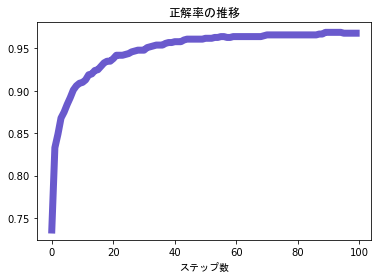

最終的な全体の正答率 94.753 パーセント
最序ステップの正答率 73.6 パーセント
最終ステップの正答率 96.8 パーセント


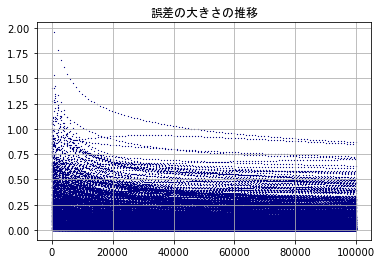

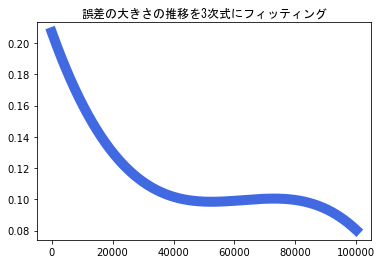

横軸が実際の数値、縦軸が予測値の誤った回数を表示する表


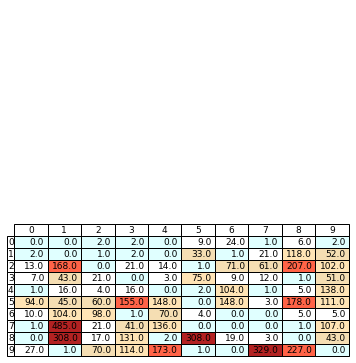

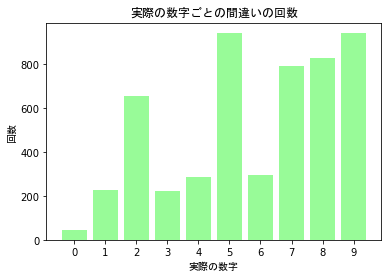

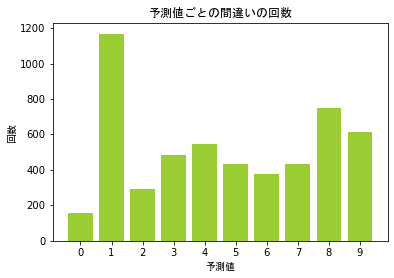

In [5]:
# 表示部



# ０～９のグラフ軸用の配列作成
ax=np.arange(0,done,1)

# 正誤の入った配列をステップごとにできるよう100,1000の形に整形
acu=acu.reshape([step,labels.size])

# 正解率の推移
a_av=np.mean(acu, axis = 1)
plt.plot(np.arange(0,step,1),a_av,color="slateblue",linewidth = 7.0)
plt.title('正解率の推移',fontname="MS Gothic")
plt.xlabel('ステップ数',fontname="MS Gothic")
plt.show()


# 誤差の大きさの推移
print("最終的な全体の正答率",(np.count_nonzero(acu == 1)/(done))*100,"パーセント")
print("最序ステップの正答率",(np.count_nonzero(acu[0] == 1))/(1000)*100,"パーセント")
print("最終ステップの正答率",(np.count_nonzero(acu[-1] == 1))/(1000)*100,"パーセント")
plt.scatter(ax,err_lis,s=0.3, c="navy", alpha=1,linewidths=0.7)
plt.title('誤差の大きさの推移',fontname="MS Gothic")
plt.grid(True)
plt.show()


# フィッティング
plt.plot(ax, np.poly1d(np.polyfit(ax, err_lis, 3))(ax),color="royalblue",linewidth = 10.0)
plt.title('誤差の大きさの推移を3次式にフィッティング',fontname="MS Gothic")
plt.show()


# 間違いの表
print("横軸が実際の数値、縦軸が予測値の誤った回数を表示する表")
color = np.full_like(err_num, "", dtype=object)
# 100以上の数値を色付けるための配列を作成
for i in range(len(err_num)):
    for j in range(len(err_num.T)):
        if err_num[i, j] >= 300:
            color[i, j] = 'firebrick'
        elif err_num[i, j] >= 150:
            color[i, j] = 'tomato'
        elif err_num[i, j] >= 75:
            color[i, j] = 'moccasin'
        elif err_num[i, j] >= 30:
            color[i, j] = 'wheat'
        elif err_num[i, j] >= 3:
            color[i, j] = 'white'
        else:
            color[i, j] = 'lightcyan'
plt.table(err_num,colLabels=np.arange(10),rowLabels=np.arange(10),cellColours=color)
plt.axis('off')
plt.show()


# 実際の数字ごとの間違いの回数
plt.bar(np.arange(10),np.sum(err_num,axis=1),color="palegreen")
plt.title('実際の数字ごとの間違いの回数',fontname="MS Gothic")
plt.xlabel('実際の数字',fontname="MS Gothic")
plt.ylabel('回数',fontname="MS Gothic")
plt.xticks(np.arange(0, 10, 1))
plt.show()


# 予測値ごとの間違いの回数
plt.bar(np.arange(10),np.sum(err_num,axis=0),color="yellowgreen")
plt.title('予測値ごとの間違いの回数',fontname="MS Gothic")
plt.xlabel('予測値',fontname="MS Gothic")
plt.ylabel('回数',fontname="MS Gothic")
plt.xticks(np.arange(0, 10, 1))
plt.show()





In [4]:
# キャンバスを使った試験
# キャンバス部


%matplotlib inline
from IPython.core.display import HTML
import base64
from io import BytesIO
HTML('''
<canvas id="canvas" height="300px" width="300px" style="border: 1px solid;"></canvas>
<p><input id="variable" type="text" placeholder="Input python variable name" value="tes" size="30"></p>
<p>
    <button id="clear">消す</button>
    <button id="submit">この数字を使う</button>
</p>
<p id="msg"></p>
<script>
    var kernel = IPython.notebook.kernel;

    var config = {
        "linesize": 7,
        "linecolor": "#000000"
    }

    var mouse = {
        "X": null,
        "Y": null,
    }

    var variable = document.getElementById("variable");
    var clear = document.getElementById("clear");
    var submit = document.getElementById("submit");
    var canvas = document.getElementById("canvas");
    var ctx = canvas.getContext("2d");

    clear.addEventListener("click", function(){
        ctx.clearRect(0, 0, canvas.width, canvas.height);
    });

    submit.addEventListener("click", function(){
        if (variable.value === ""){
            msg.textContent = "Fail: Pls input variable name";
        }else{
            kernel.execute(variable.value + " = '" + canvas.toDataURL() + "'");
            msg.textContent = "Success: " + "image -> " + variable.value;
        }
    });

    canvas.addEventListener("mouseup", drawEnd, false);
    canvas.addEventListener("mouseout", drawEnd, false);
    
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons === 1 || e.witch === 1) {
            var rect = e.target.getBoundingClientRect();
            var X = e.clientX - rect.left;
            var Y = e.clientY - rect.top;
            draw(X, Y);
        };
    });
 
    canvas.addEventListener("mousedown", function(e){
        if (e.button === 0) {
            var rect = e.target.getBoundingClientRect();
            var X = e.clientX - rect.left;
            var Y = e.clientY - rect.top;
            draw(X, Y);
        }
    });

    function draw(X, Y) {
        ctx.beginPath();
        if (mouse.X === null) {
            ctx.moveTo(X, Y);
        } else {
            ctx.moveTo(mouse.X, mouse.Y);
        }
        ctx.lineTo(X, Y);
        
        ctx.lineCap = "round";
        ctx.lineWidth = config.linesize * 2.5;
        ctx.strokeStyle = config.linecolor;
        ctx.stroke();

        mouse.X = X;
        mouse.Y = Y;
    };
 
    function drawEnd() {
        mouse.X = null;
        mouse.Y = null;
    }
</script>
''')


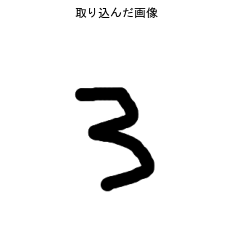

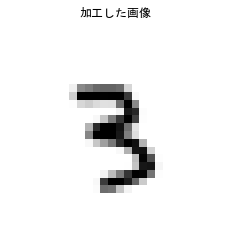

実際の数値は？:3
実際の数字: 3 予測した数字 3 誤差指数 0.5667805 当たったよ！やったね


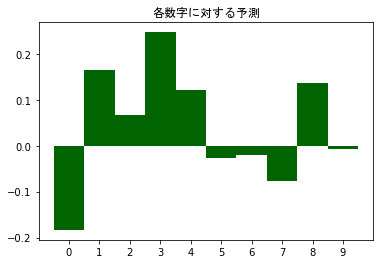

In [6]:
# 試験部



# 画像加工用にPILライブラリをインポート
from PIL import Image

tes = tes.split(",")[-1]

img = Image.open(BytesIO(base64.b64decode(tes)))

plt.imshow(np.asarray(img))
plt.title("取り込んだ画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 取り出した画像をリサイズ（指定ピクセルの大きさに変換）、白黒にコンバート
res_img=img.convert(mode="LA").resize((28,28))
plt.imshow(res_img)
plt.title("加工した画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 加工した画像を一次元配列化し、一番深い配列にガンマ値の要素が残っているので削除する
mol_img=np.delete(res_img, 0, -1).reshape(-2)
# print(mol_img.reshape(28,28))
# 実際の数字の入力
num=int(input("実際の数値は？:"))
# 予測値を導出
pred=np.dot(mol_img,wei)
# 実際の数字を上記labelsの形に落とし込む
num_lis=np.zeros(10)
num_lis[num]=1
# 純誤差(偏差)の導出
err=pred-num_lis
# エラーと入力値による直積でデルタを導出
DaM=np.outer(mol_img,err)
# 一番大きい(1に近い)値をpredから取り出す
nea=pred.argmax()
# 実際の値に対しての誤差の大きさを出し、格納
ers=round((1-pred[num])**2,7)
# 正誤判定
if nea==num:
    msg="当たったよ！やったね"
else:
    msg="残念…もっと字を綺麗に書こう"
# 出力  
print("実際の数字:",num,"予測した数字",nea,"誤差指数",ers,msg)
# グラフ化
plt.bar(np.arange(10),pred, width=1.0,color="darkgreen")
plt.xticks(np.arange(0, 10, 1))
plt.title("各数字に対する予測",fontname="MS Gothic")
wei-=(DaM*alp)

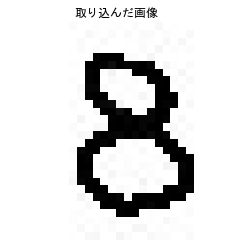

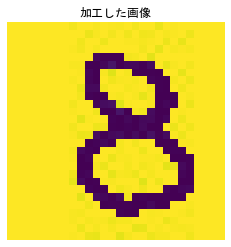

実際の数値は？:8
実際の数字: 8 予測した数字 8 誤差指数 0.0018412 当たったよ！やったね


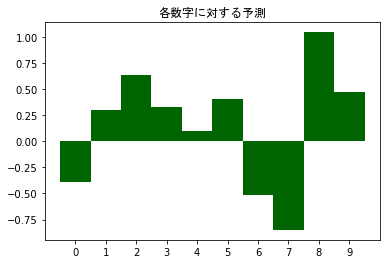

In [11]:
# 画像取り込みによる試験





# 画像を取り出す
# img_name='four.jpg'
img_name='test.jpg'
img=Image.open(img_name) 
plt.imshow(img)
plt.title("取り込んだ画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 取り出した画像をリサイズ（指定ピクセルの大きさに変換）、白黒にコンバート
res_img=img.resize((28,28)).convert(mode="L")
plt.imshow(res_img)
plt.title("加工した画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 加工した画像を一次元配列化し、先ほどのコンバートの仕様上白黒が逆転しているので元の色身に戻す
mol_img=255-np.array(res_img).reshape(-1)
# print(mol_img.reshape(28,28))
# 実際の数字の入力
num=int(input("実際の数値は？:"))
# 予測値を導出
pred=np.dot(mol_img,wei)
# 実際の数字を上記labelsの形に落とし込む
num_lis=np.zeros(10)
num_lis[num]=1
# 純誤差(偏差)の導出
err=pred-num_lis
# エラーと入力値による直積でデルタを導出
DaM=np.outer(mol_img,err)
# 一番大きい(1に近い)値をpredから取り出す
nea=pred.argmax()
# 実際の値に対しての誤差の大きさを出し、格納
ers=round((1-pred[num])**2,7)
# 正誤判定
if nea==num:
    msg="当たったよ！やったね"
else:
    msg="残念…もっと字を綺麗に書こう"
# 出力  
print("実際の数字:",num,"予測した数字",nea,"誤差指数",ers,msg)
# グラフ化
plt.bar(np.arange(10),pred, width=1.0,color="darkgreen")
plt.xticks(np.arange(0, 10, 1))
plt.title("各数字に対する予測",fontname="MS Gothic")
wei-=(DaM*alp*0.000001)

In [8]:
wei_mat=wei.reshape([10,28,28])
print(wei_mat[0])

[[ 1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.000

In [14]:
strs=["     11111   ",
      " 1 1 111111  ",
      "1     1 1 1 1"]
str_lis=[]
for str in strs:
    pre_lis=[]
    for item in str:
        if item=="1":
            pre_lis+=[1]
        else:
            pre_lis+=[0]
    str_lis+=[pre_lis]
print(str_lis)

[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]]


In [15]:
# エラー
list=[1,2,3]
list+=2
print(list)
# 正常
list=[1,2,3]
list+=[2]
print(list)
# 括弧

TypeError: 'int' object is not iterable